In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy.stats as stats
import datetime
from tqdm import tqdm
import random

mpl.rc('font', family='Malgun Gothic')

In [3]:
# generate dataframe
df_member = pd.read_csv('./Member_Data.csv', encoding='cp949')
df_member = df_member.drop(columns='Unnamed: 0')

df_product = pd.read_csv('./Product_Data.csv', encoding='utf-8')

df_sales = pd.read_csv('./Sales_Data05.csv', encoding='utf-8')

In [4]:
df_member.head()

ÌöåÏõêÎ≤àÌò∏  ÌöåÏõêÏÉÅÌÉú ÏÑ±Î≥Ñ  ÎÇòÏù¥   Îì±Î°ùÏπ¥Îìú   Í≤∞Ìòº   Íµ¨ÎèÖÏó¨Î∂Ä    Ï£ºÏÜåÏßÄ ÏÑ∏Î∂ÄÏ£ºÏÜåÏßÄ
0  18764160  Ï†ïÏÉÅÌöåÏõê  Ïó¨  68  ÎÜçÌòëÏ§ëÏïôÌöå   Í∏∞Ìòº  False  ÏÑúÏö∏ÌäπÎ≥ÑÏãú   ÏÑ±ÎèôÍµ¨
1  18792000  Ï†ïÏÉÅÌöåÏõê  ÎÇ®  83  Ïó∞Í≤∞Ïï±Í≤∞Ï†ú  NaN  False    Í∞ïÏõêÎèÑ   Í∞ïÎ¶âÏãú
2  18942336  Ï†ïÏÉÅÌöåÏõê  Ïó¨  39   Ïã†ÌïúÏùÄÌñâ   Í∏∞Ìòº  False  Ïù∏Ï≤úÍ¥ëÏó≠Ïãú    Ï§ëÍµ¨
3  18949760  Ï†ïÏÉÅÌöåÏõê  Ïó¨  73   Í∏∞ÏóÖÏùÄÌñâ  NaN    NaN    Í∞ïÏõêÎèÑ   ÌôçÏ≤úÍµ∞
4  19391488  Ï†ïÏÉÅÌöåÏõê  Ïó¨  52  Ïó∞Í≤∞Ïï±Í≤∞Ï†ú   Í∏∞Ìòº  False  ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú    Ï§ëÍµ¨

In [5]:
df_product.head()

Ï†úÌíàÎ≤àÌò∏      Î¨ºÌíàÎ™Ö  Î¨ºÌíàÎåÄÎ∂ÑÎ•ò   Î¨ºÌíàÏ§ëÎ∂ÑÎ•ò       ÏÉÅÌíàÏ§ëÎüâ
0  100021V2_0    2Îã®Î¨¥Îä¨Ïªµ  ÏãùÍ∏∞/Ìé∏Î∞±      ÏûêÍ∏∞         1p
1  100022V2_1  7Í≥°Îî∏Í∏∞Î°§Í≥ºÏûê     Í≥ºÏûê      Ïä§ÎÇµ  100g/10Í∞úÏûÖ
2  100023V2_2     7Í≥°Ï∞∏Ïãù   ÏãùÏÇ¨ÎåÄÏö©   ÏÑ†Ïãù/ÏÉùÏãù       700g
3  100024V2_3      Í∞ÄÎ¶¨ÎπÑ   ÏÉùÎ¨ºÏàòÏÇ∞  Ìå®Î•ò/Í∞ëÍ∞ÅÎ•ò      1.5kg
4  100025V2_3      Í∞ÄÎ¶¨ÎπÑ   ÏÉùÎ¨ºÏàòÏÇ∞  Ìå®Î•ò/Í∞ëÍ∞ÅÎ•ò        1kg

In [6]:
df_sales.head()

ÌöåÏõêÎ≤àÌò∏  ÌöåÏõêÏÉÅÌÉú  Íµ¨Îß§ÏàòÎüâ   Íµ¨Îß§Í∏àÏï°        Ï£ºÎ¨∏ÏùºÏãú       Î∞∞ÏÜ°ÏãúÏûëÏùº       Î∞∞ÏÜ°ÏôÑÎ£åÏùº  ÏÇ¨Ïö© Ï†ÅÎ¶ΩÍ∏à  \
0  1032097472  Ï†ïÏÉÅÌöåÏõê   1.0   7083  2021-01-02         NaN         NaN       0   
1  1032097472  Ï†ïÏÉÅÌöåÏõê   1.0  29865  2021-01-02  2021-01-02  2021-01-02       0   
2  1032097472  Ï†ïÏÉÅÌöåÏõê   1.0  23164  2021-01-02  2021-01-02  2021-01-03       0   
3   369152832  Ï†ïÏÉÅÌöåÏõê   1.0  16655  2021-01-02  2021-01-02  2021-01-03       0   
4  1032097472  Ï†ïÏÉÅÌöåÏõê   1.0   8423  2021-01-02         NaN         NaN       0   

   ÏÇ¨Ïö© Ìè¨Ïù∏Ìä∏ ÎÑ§Ïù¥Î≤Ñ Ï£ºÎ¨∏Ï∑®ÏÜåÏó¨Î∂Ä      Ï£ºÎ¨∏ÏãúÍ∞Ñ              Ï†úÌíàÎ≤àÌò∏  
0           0   Ï£ºÎ¨∏Ï∑®ÏÜå  Ïò§ÌõÑ 12:60  100021783V2_1337  
1           0    NaN  Ïò§ÌõÑ 12:60  100022137V2_1606  
2           0    NaN  Ïò§ÌõÑ 12:60  100021452V2_1113  
3           0    NaN  Ïò§ÌõÑ 12:60    10002931V2_708  
4           0   Ï£ºÎ¨∏Ï∑®ÏÜå  Ïò§ÌõÑ 12:60  100022085V2_1559

## Í≥†Í∞ù Ïù¥ÌÉàÎ•†
df_member ÏóêÏÑú ÌöåÏõê ÏÉÅÌÉúÎ°ú Ï†ïÏÉÅÌöåÏõêÍ≥º ÌÉàÌá¥ÌöåÏõê ÌååÏïÖ Í∞ÄÎä•

Í≥†Í∞ù Ïù¥ÌÉàÎ•†(%) = ( ÌÉàÌá¥ÌöåÏõê Ïàò / Ï†ÑÏ≤¥ ÌöåÏõê Ïàò ) * 100

In [7]:
df_member['ÌöåÏõêÏÉÅÌÉú'].value_counts(dropna=False)

ÌöåÏõêÏÉÅÌÉú
Ï†ïÏÉÅÌöåÏõê     12380
ÌÉàÌá¥         156
ÌÉàÌá¥Ï≤òÎ¶¨Ï§ë        2
NaN          1
ÌÉàÌá¥Ïã†Ï≤≠         1
Name: count, dtype: int64

In [8]:
# ÌÉàÌá¥ ÌöåÏõê Ïàò
cond_withdraw = (df_member['ÌöåÏõêÏÉÅÌÉú'] != 'Ï†ïÏÉÅÌöåÏõê')
withdraw = len(df_member.loc[cond_withdraw])

# Í≥†Í∞ù Ïù¥ÌÉàÎ•† Í≥ÑÏã† ÌÉàÌá¥ ÌöåÏõê Ïàò
cond_withdraw = (df_member['ÌöåÏõêÏÉÅÌÉú'] != 'Ï†ïÏÉÅÌöåÏõê')
withdraw = len(df_member.loc[cond_withdraw])

# Í≥†Í∞ù Ïù¥ÌÉàÎ•† Í≥ÑÏã†
withdraw_rate = (withdraw / len(df_member)) * 100
print(f"Í≥†Í∞ù Ïù¥ÌÉàÎ•†(%): {np.round(withdraw_rate, 3)}%")

# Í≥†Í∞ù Ïù¥ÌÉàÎ•†ÏùÄ 1.276%Î°ú ÌÅ¨Í≤å ÎÜíÎã§Í≥† ÏÉùÍ∞ÅÏù¥ Îì§ÏßÄÎäî ÏïäÏùå. Í≥†Í∞ù Ïù¥ÌÉàÎ•†ÏùÑ Ïú†ÏùòÎØ∏ÌïòÍ≤å Ï§ÑÏù¥Í∏∞Î≥¥Îã§
# Îã§ÏñëÌïú ÎßàÏºÄÌåÖ Ï†ÑÎûµÏùÑ ÏãúÎèÑÌïòÎ©¥ÏÑú Í≥†Í∞ù Ïù¥ÌÉàÎ•†ÏùÑ Ïú†ÏßÄÌïòÍ±∞ÎÇò 10% ÎÇ¥Ïô∏Î°ú Î≥ÄÎèôÌïòÍ≤å Ïú†ÏßÄÌïòÎäî Í≤ÉÏù¥ Ï§ëÏöîÌïòÎã§Í≥† ÌåêÎã®

# ÌÉàÌá¥ ÌöåÏõêÏùò ÌäπÏßïÏùÄ Î¨¥ÏóáÏù∏ÏßÄ Í∑∏Îì§Ïùò df_salesÏóêÏÑú ÌôïÏù∏Ìï¥Î¥êÎèÑ Ï¢ãÏùÑ ÎìØ!!!

Í≥†Í∞ù Ïù¥ÌÉàÎ•†(%): 1.276%


## Íµ¨Îß§Ï£ºÍ∏∞ nÍ∞úÏõî Ïù¥Ìïò Í≥†Í∞ù ÎπÑÏú®
df_salesÏóêÏÑú Í∞Å Í≥†Í∞ùÎ≥ÑÎ°ú Ï£ºÎ¨∏ ÎÇ¥Ïó≠ÏùÑ monthlyÎ°ú ÏÇ¥Ìé¥Î≥∏ Îí§, Íµ¨Îß§Ï£ºÍ∏∞Í∞Ä nÍ∞úÏõî Ïù¥ÌïòÏù∏ Í≥†Í∞ù ÌååÏïÖ

nÍ∞úÏõî Íµ¨Îß§Ï£ºÍ∏∞ Í≥†Í∞ù ÎπÑÏú®(%) = ( nÍ∞úÏõî Íµ¨Îß§Ï£ºÍ∏∞ Í≥†Í∞ù Ïàò / Ï†ÑÏ≤¥ Í≥†Í∞ù Ïàò ) * 100


In [9]:
# to_datetime
df_sales[['Ï£ºÎ¨∏ÏùºÏãú',
          'Î∞∞ÏÜ°ÏãúÏûëÏùº',
          'Î∞∞ÏÜ°ÏôÑÎ£åÏùº']] = df_sales[['Ï£ºÎ¨∏ÏùºÏãú', 'Î∞∞ÏÜ°ÏãúÏûëÏùº', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº']].apply(pd.to_datetime)

In [10]:
# check sales of each member according to orderdate
memberwise_sales = df_sales.groupby(['ÌöåÏõêÎ≤àÌò∏','Ï£ºÎ¨∏ÏùºÏãú']).count().reset_index()
memberwise_sales

ÌöåÏõêÎ≤àÌò∏       Ï£ºÎ¨∏ÏùºÏãú  ÌöåÏõêÏÉÅÌÉú  Íµ¨Îß§ÏàòÎüâ  Íµ¨Îß§Í∏àÏï°  Î∞∞ÏÜ°ÏãúÏûëÏùº  Î∞∞ÏÜ°ÏôÑÎ£åÏùº  ÏÇ¨Ïö© Ï†ÅÎ¶ΩÍ∏à  \
0         18764160 2021-01-03     2     2     2      2      2       2   
1         18764160 2021-01-23     3     3     3      3      3       3   
2         18764160 2021-03-30     2     2     2      2      2       2   
3         18764160 2021-04-11     1     1     1      1      1       1   
4         18764160 2021-04-14     1     1     1      1      1       1   
...            ...        ...   ...   ...   ...    ...    ...     ...   
193289  1670620864 2021-04-27     1     1     1      1      1       1   
193290  1670620864 2021-04-28     8     8     8      8      8       8   
193291  1670620864 2021-04-30     2     2     2      2      2       2   
193292  1670620864 2021-06-02     2     2     2      2      2       2   
193293  1670620864 2021-06-06     1     1     1      1      1       1   

        ÏÇ¨Ïö© Ìè¨Ïù∏Ìä∏ ÎÑ§Ïù¥Î≤Ñ  Ï£ºÎ¨∏Ï∑®ÏÜåÏó¨Î∂Ä  Ï£ºÎ¨∏ÏãúÍ∞Ñ  Ï†úÌíàÎ≤àÌò∏  
0                2       0     2     2  
1                3       0     3     3  
2                2       0     2     2  
3                1       0     1     1  
4                1       0     1     1  
...            ...     ...   ...   ...  
193289           1       0     1     1  
193290           8       0     8     8  
193291           2       0     2     2  
193292           2       0     2     2  
193293           1       0     1     1  

[193294 rows x 12 columns]

In [11]:
def isloyal(member_list, memberwise_sales, gap):
    a = []
    b = []
    col_name = ['ÌöåÏõêÎ≤àÌò∏', 'count']
    
    # Î©§Î≤Ñ Ìïú Î™ÖÏî© Ï£ºÎ¨∏ ÏùºÏãúÎ•º ÏÇ¥Ìé¥Î≥º Îïå,
    for member in member_list:
        target_member = memberwise_sales[memberwise_sales['ÌöåÏõêÎ≤àÌò∏'] == member].sort_values(by='Ï£ºÎ¨∏ÏùºÏãú')
        count = 0  # Î©§Î≤ÑÎßàÎã§ Íµ¨Îß§Ïú†ÏßÄÎ•º ÌïòÏßÄ Î™ªÌïú ÌöüÏàò
        
        # ÌäπÏ†ï ÌÉÄÍ≤ü Î©§Î≤ÑÏùò Ï£ºÎ¨∏ ÎÇ¥Ïó≠ÏùÑ ÏàúÌöå
        for i in range(len(target_member) - 1):
            sales_gap = (target_member['Ï£ºÎ¨∏ÏùºÏãú'].iloc[i+1] - target_member['Ï£ºÎ¨∏ÏùºÏãú'].iloc[i])
            if sales_gap > gap:
                count += 1

        a.append(member)
        b.append(count)

    list_df = pd.DataFrame({'ÌöåÏõêÎ≤àÌò∏': a, 'count': b})
    
    return list_df

In [12]:
# Íµ¨Îß§Ïú†ÏßÄÏùò Í∏∞Ï§ÄÏù¥ ÎêòÎäî timedelta
gap = datetime.timedelta(days=120)

# Ïã§Ìñâ
result = isloyal(memberwise_sales['ÌöåÏõêÎ≤àÌò∏'].unique(), memberwise_sales, gap)
print(result)

             ÌöåÏõêÎ≤àÌò∏  count
0        18764160      0
1        18792000      0
2        18942336      0
3        18949760      0
4        19391488      0
...           ...    ...
12535  1644957952      0
12536  1645334720      0
12537  1670400000      0
12538  1670606016      1
12539  1670620864      0

[12540 rows x 2 columns]


In [13]:
result['count'].value_counts()

count
0    11274
1     1262
2        4
Name: count, dtype: int64

In [14]:
# Ïû•Í∏∞Í≥†Í∞ùÏùò Í∏∞Ï§ÄÏù¥ ÎêòÎäî countÎäî ÏûÑÏùòÎ°ú 1Î≤àÏù¥ÎÇ¥Î°ú ÏÑ§Ï†ï. gap Í∞í Î≥ÄÌôîÌï¥Í∞ÄÎ©¥ÏÑú ÏÇ¥Ìé¥Î≥º Í≤É!!!
print(f"Ïû•Í∏∞Í≥†Í∞ùÎπÑÏú®: {result['count'].value_counts()[0] / 12540}")

Ïû•Í∏∞Í≥†Í∞ùÎπÑÏú®: 0.899043062200957


## Î∞∞ÏÜ° ÏßÄÏó∞Î•†
Ìï¥Îãπ Í∏∞ÏóÖÏù¥ ÏãùÌíàÏùÑ ÎãπÏùº Î∞∞ÏÜ°Ìï¥Ï£ºÎäî ÏãúÏä§ÌÖúÏúºÎ°ú Íµ¨ÏÑ±ÎêòÏóàÏúºÎØÄÎ°ú, Î∞∞ÏÜ° ÏßÄÏó∞Ïùò Í∏∞Ï§Ä ÏùºÏûêÎäî 2ÏùºÎ°ú ÏÑ§Ï†ï

Ï£ºÎ¨∏ÏùºÏãúÏôÄ Î∞∞ÏÜ°ÏôÑÎ£å 2ÏùºÏùº Ïù¥ÏÉÅ Ï∞®Ïù¥ÎÇòÎäî Í≤ΩÏö∞Î•º Î∞∞ÏÜ°ÏßÄÏó∞Ïù¥ÎùºÏ†ïÏùò

, Î∞∞ÏÜ° ÏßÄÏó∞Ïú®(%) = ( Î∞∞ÏÜ°ÏßÄÏó∞ Î∞úÏÉù Í±¥ / Ï†ÑÏ≤¥ Ï£ºÎ¨∏ Í±¥ ) * 100

In [15]:
# Î©§Î≤ÑÎ≥ÑÎ°ú Î∞∞ÏÜ°ÏãúÏûëÏùºÍ≥º Î∞∞ÏÜ°ÏôÑÎ£åÏùº
memberwise_delivery = df_sales.groupby(['ÌöåÏõêÎ≤àÌò∏','Ï£ºÎ¨∏ÏùºÏãú','Î∞∞ÏÜ°ÏãúÏûëÏùº','Î∞∞ÏÜ°ÏôÑÎ£åÏùº']).count().reset_index()
memberwise_delivery

ÌöåÏõêÎ≤àÌò∏       Ï£ºÎ¨∏ÏùºÏãú      Î∞∞ÏÜ°ÏãúÏûëÏùº      Î∞∞ÏÜ°ÏôÑÎ£åÏùº  ÌöåÏõêÏÉÅÌÉú  Íµ¨Îß§ÏàòÎüâ  Íµ¨Îß§Í∏àÏï°  ÏÇ¨Ïö© Ï†ÅÎ¶ΩÍ∏à  \
0         18764160 2021-01-03 2021-01-03 2021-01-03     1     1     1       1   
1         18764160 2021-01-03 2021-01-05 2021-01-06     1     1     1       1   
2         18764160 2021-01-23 2021-01-23 2021-01-25     1     1     1       1   
3         18764160 2021-01-23 2021-01-24 2021-01-25     1     1     1       1   
4         18764160 2021-01-23 2021-01-24 2021-01-26     1     1     1       1   
...            ...        ...        ...        ...   ...   ...   ...     ...   
424684  1670620864 2021-04-30 2021-04-30 2021-04-30     1     1     1       1   
424685  1670620864 2021-04-30 2021-04-30 2021-05-01     1     1     1       1   
424686  1670620864 2021-06-02 2021-06-02 2021-06-03     1     1     1       1   
424687  1670620864 2021-06-02 2021-06-02 2021-06-04     1     1     1       1   
424688  1670620864 2021-06-06 2021-06-06 2021-06-07     1     1     1       1   

        ÏÇ¨Ïö© Ìè¨Ïù∏Ìä∏ ÎÑ§Ïù¥Î≤Ñ  Ï£ºÎ¨∏Ï∑®ÏÜåÏó¨Î∂Ä  Ï£ºÎ¨∏ÏãúÍ∞Ñ  Ï†úÌíàÎ≤àÌò∏  
0                1       0     1     1  
1                1       0     1     1  
2                1       0     1     1  
3                1       0     1     1  
4                1       0     1     1  
...            ...     ...   ...   ...  
424684           1       0     1     1  
424685           1       0     1     1  
424686           1       0     1     1  
424687           1       0     1     1  
424688           1       0     1     1  

[424689 rows x 12 columns]

In [16]:
def late_delivery(member_list, memberwise_sales, deli_gap):
    a = []
    b = []
    col_name = ['ÌöåÏõêÎ≤àÌò∏', 'delivery_count']
    
    # Î©§Î≤Ñ Ìïú Î™ÖÏî© Ï£ºÎ¨∏ ÏùºÏãúÎ•º ÏÇ¥Ìé¥Î≥º Îïå,
    for member in member_list:
        target_member = memberwise_sales[memberwise_sales['ÌöåÏõêÎ≤àÌò∏'] == member].sort_values(by='Ï£ºÎ¨∏ÏùºÏãú')
        delivery_count = 0  # Î©§Î≤ÑÎßàÎã§ Î∞∞ÏÜ°ÏßÄÏó∞Ïù¥ Î∞úÏÉùÌïú ÌöüÏàò
        
        # ÌäπÏ†ï ÌÉÄÍ≤ü Î©§Î≤ÑÏùò Ï£ºÎ¨∏ ÎÇ¥Ïó≠ÏùÑ ÏàúÌöå
        for i in range(len(target_member)):
            delivery_gap = (target_member['Î∞∞ÏÜ°ÏôÑÎ£åÏùº'].iloc[i] - target_member['Ï£ºÎ¨∏ÏùºÏãú'].iloc[i])
            if delivery_gap > deli_gap:
                delivery_count += 1

        a.append(member)
        b.append(delivery_count)

    list_df = pd.DataFrame({'ÌöåÏõêÎ≤àÌò∏': a, 'delivery_count': b})
    
    return list_df

In [17]:
# Î∞∞ÏÜ°ÏßÄÏó∞Ïùò Í∏∞Ï§ÄÏù¥ ÎêòÎäî timedelta (2Ïùº)
deli_gap = datetime.timedelta(days=2)

# Ïã§Ìñâ
deli_result = late_delivery(memberwise_sales['ÌöåÏõêÎ≤àÌò∏'].unique(), memberwise_delivery, deli_gap)
print(deli_result)

             ÌöåÏõêÎ≤àÌò∏  delivery_count
0        18764160               4
1        18792000               0
2        18942336               6
3        18949760               0
4        19391488               0
...           ...             ...
12535  1644957952               1
12536  1645334720               0
12537  1670400000             128
12538  1670606016               0
12539  1670620864               1

[12540 rows x 2 columns]


In [18]:
deli_result['delivery_count'].value_counts()

delivery_count
0      5642
1      2347
2      1185
3       774
4       530
5       415
6       321
7       235
8       147
9       145
10      138
12      102
11      100
13       64
14       58
15       48
16       43
17       32
18       31
21       19
22       19
19       18
23       16
20       12
24       12
25       11
26       10
30        9
29        7
32        7
28        6
38        6
27        5
31        4
34        3
39        3
35        3
48        2
44        2
36        2
43        1
58        1
40        1
45        1
33        1
37        1
128       1
Name: count, dtype: int64

In [19]:
# Î∞∞ÏÜ°ÏßÄÏó∞Ïùò Í∏∞Ï§ÄÏù¥ ÎêòÎäî deli_countÎäî ÏûÑÏùòÎ°ú 5Î≤àÏù¥ÏÉÅÏúºÎ°ú ÏÑ§Ï†ï. deli_gap Í∞í Î≥ÄÌôîÌï¥Í∞ÄÎ©¥ÏÑú ÏÇ¥Ìé¥Î≥¥Í≥†
# Îã®ÏàúÌûà ÌöüÏàòÍ∞Ä ÏïÑÎãàÎùº Í∞úÏù∏Ïùò Ï†ÑÏ≤¥ Ï£ºÎ¨∏Ïùò Î™á % Ïù∏ÏßÄÎ°úÎèÑ ÏÇ¥Ìé¥Î≥¥Í∏∞!!!
print(f"Î∞∞ÏÜ°ÏßÄÏó∞ÎπÑÏú®: {(1 - (5642+2347+1185+774+530) / 12540) * 100}")

Î∞∞ÏÜ°ÏßÄÏó∞ÎπÑÏú®: 16.443381180223284


## Ï†ïÍ∏∞Íµ¨ÎèÖÎ•†
Ï†ïÍ∏∞Íµ¨ÎèÖÎ•† = (Íµ¨ÎèÖ ÌöåÏõêÏàò) / (Ï†ÑÏ≤¥ ÌöåÏõêÏàò) * 100

In [20]:
# Íµ¨ÎèÖX = NaN(Í≤∞Ï∏°Í∞í), False  /  Íµ¨ÎèÖO =  True Í∞ÄÏ†ï.
df_member['Íµ¨ÎèÖÏó¨Î∂Ä'].value_counts(dropna=False)

Íµ¨ÎèÖÏó¨Î∂Ä
False    8441
NaN      2346
True     1753
Name: count, dtype: int64

In [21]:
# Ï†ïÍ∏∞Íµ¨ÎèÖ ÌöåÏõê Ïàò
cond_sub = (df_member['Íµ¨ÎèÖÏó¨Î∂Ä'] == 'True')
sub_customer = len(df_member.loc[cond_sub])

# Ï†ïÍ∏∞ Íµ¨ÎèÖÎ•†
subscription_rate = (sub_customer / len(df_member)) * 100
print(f"Ï†ïÍ∏∞Íµ¨ÎèÖÎ•†ÏùÄ {subscription_rate}% Ïù¥Îã§.")

Ï†ïÍ∏∞Íµ¨ÎèÖÎ•†ÏùÄ 0.0% Ïù¥Îã§.


## Ïú†Î†πÌöåÏõê Ïàò
Ïú†Î†πÍ≥†Í∞ù = Í∞ÄÏû• ÏµúÏã† Ï£ºÎ¨∏ Í±¥ Í∏∞Ï§Ä nÍ∞úÏõî Í∞Ñ Ï£ºÎ¨∏Ïù¥ ÏóÜÎäî Í≥†Í∞ù.

In [22]:
def isghost(member_list, memberwise_sales, active_member):
    a = []
    b = []
    col_name = ['ÌöåÏõêÎ≤àÌò∏', 'isghost']

    # Î™®Îì† Ï†ïÏÉÅÌöåÏõê ÌÜµÌãÄÏñ¥ Í∞ÄÏû• ÏµúÍ∑º Ï£ºÎ¨∏ ÏãúÍ∏∞
    last_order = memberwise_sales['Ï£ºÎ¨∏ÏùºÏãú'].max() 

    chronologic_order = memberwise_sales.sort_values(by=['ÌöåÏõêÎ≤àÌò∏',
                                                         'Ï£ºÎ¨∏ÏùºÏãú'], ascending=[True, False])[['ÌöåÏõêÎ≤àÌò∏',
                                                                                            'Ï£ºÎ¨∏ÏùºÏãú']]
    
    # Î©§Î≤Ñ Ìïú Î™ÖÏî© Ï£ºÎ¨∏ ÏùºÏãúÎ•º ÏÇ¥Ìé¥Î≥º Îïå, ÌöåÏõêÎ≥Ñ Ï£ºÎ¨∏ÏùºÏãúÎ•º ÏµúÏã†ÏàúÏúºÎ°ú Ï†ïÎ†¨Ìï¥ÏÑú ÏàúÌöå
    for member in tqdm(member_list):
        isghost = 0
        
        target_member = chronologic_order[chronologic_order['ÌöåÏõêÎ≤àÌò∏'] == member]

        # ÌäπÏ†ï ÌÉÄÍ≤ü Î©§Î≤ÑÏùò Ï£ºÎ¨∏ ÎÇ¥Ïó≠ÏùÑ ÏàúÌöå, Í∞ÄÏû• ÏµúÍ∑º Ï£ºÎ¨∏Í≥º ÌòÑÏû¨ÏãúÏ†ê ÏÇ¨Ïù¥Ïùò ÏãúÍ∞ÑÍ∞ÑÍ≤© Í≥ÑÏÇ∞
        
        latest_gap = last_order - target_member['Ï£ºÎ¨∏ÏùºÏãú'].iloc[0]

        if latest_gap > datetime.timedelta(days=120):
            #ÌòÑÏû¨ ÏãúÏ†êÏúºÎ°úÎ∂ÄÌÑ∞ 4Í∞úÏõî ÎÑòÍ≤å Ï£ºÎ¨∏ÌïòÏßÄ ÏïäÏùÄ Í≤ΩÏö∞ Ïú†Î†πÌöåÏõêÏúºÎ°ú ÌåêÎ≥Ñ
            isghost = 1
            
        a.append(member)
        b.append(isghost)

    list_df = pd.DataFrame({'ÌöåÏõêÎ≤àÌò∏': a, 'isghost': b})
    
    return list_df

In [23]:
# Ïã§Ìñâ
active_member = df_member[df_member['ÌöåÏõêÏÉÅÌÉú'] == 'Ï†ïÏÉÅÌöåÏõê']['ÌöåÏõêÎ≤àÌò∏']

active_memberwise_sales = memberwise_sales[memberwise_sales['ÌöåÏõêÎ≤àÌò∏'].isin(active_member)]

isghost_result = isghost(active_memberwise_sales['ÌöåÏõêÎ≤àÌò∏'].unique(), active_memberwise_sales, active_member)
print(isghost_result)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12380/12380 [00:09<00:00, 1322.55it/s]

             ÌöåÏõêÎ≤àÌò∏  isghost
0        18764160        0
1        18792000        1
2        18942336        0
3        18949760        0
4        19391488        1
...           ...      ...
12375  1644772352        0
12376  1644957952        0
12377  1645334720        0
12378  1670606016        0
12379  1670620864        1

[12380 rows x 2 columns]


In [24]:
isghost_result['isghost'].value_counts()

isghost
0    9522
1    2858
Name: count, dtype: int64

In [25]:
ghost_customer = isghost_result['isghost'].sum()
active_member = df_member[df_member['ÌöåÏõêÏÉÅÌÉú'] == 'Ï†ïÏÉÅÌöåÏõê']['ÌöåÏõêÎ≤àÌò∏'].unique()

# Ïú†Î†πÍ≥†Í∞ù ÎπÑÏú®
ghost_customer_rate = ghost_customer / len(active_member) * 100
print(f"Ïú†Î†πÍ≥†Í∞ù ÎπÑÏú®ÏùÄ {ghost_customer_rate}% Ïù¥Îã§.")

Ïú†Î†πÍ≥†Í∞ù ÎπÑÏú®ÏùÄ 23.08562197092084% Ïù¥Îã§.


# Roadmap
1. Í≥†Í∞ùÎ≥Ñ Ïó∞Î†πÎåÄ, Í±∞Ï£ºÏßÄ, Íµ¨Îß§ÎπàÎèÑ, Íµ¨Îß§Í∏àÏï°, Íµ¨Îß§Ï†úÌíàÏ¢ÖÎ•ò(Ï§ëÎ∂ÑÎ•ò, ÏÜåÎ∂ÑÎ•ò, Ï†úÌíàÎ≤àÌò∏ Îì± Îã§ÏñëÌïú Î≤îÏúÑÏóêÏÑú) Îì±Ïùò Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Í≥†Í∞ù Í∑∏Î£πÏóê ÎåÄÌïú ÌäπÏßïÏùÑ ÌååÏïÖ[Íµ∞ÏßëÎ∂ÑÏÑù, RFMÎ∂ÑÏÑù Îì±]ÌïòÍ≥† ÎπÑÏä∑Ìïú Í≥†Í∞ù Íµ∞Ïßë ÏÉùÏÑ±Ìï¥ Í≥†Í∞ù Ïú†ÌòïÏùÑ ÏÑ§Ï†ï.

2. Ïù∏Í∏∞ÏÉÅÌíàÏù¥ÎÇò Ïπ¥ÌÖåÍ≥†Î¶¨Ïóê ÎåÄÌïú ÏÜåÎπÑ Ìä∏Î†åÎìú ÌôïÏù∏(ÏõîÎ≥Ñ Ïù∏Í∏∞ÏÉÅÌíà, Î∂ÑÍ∏∞Î≥Ñ Ïù∏Í∏∞ ÏÉÅÌíà(Ïπ¥ÌÖåÍ≥†Î¶¨) Îì±)

3. Sales Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©ÌïòÏó¨ Í≥†Í∞ùÎ≥ÑÎ°ú Íµ¨Îß§Ï£ºÍ∏∞Í∞Ä Ïñ¥Îñ§ÏßÄ ÌôïÏù∏ÌïòÍ≥†, Ïù¥Î•º Ïù¥Ïö©Ìï¥ Îã§Ïùå Íµ¨Îß§ Ï£ºÍ∏∞Ïóê Ïñ¥Îñ§ ÏÉÅÌíàÏùÑ Íµ¨Îß§Ìï†ÏßÄ ÏòàÏ∏°ÌïòÎäî Î™®Îç∏ Íµ¨ÏÑ±
[ÌöåÏõêÎßàÎã§ Í≥ºÍ±∞ Íµ¨Îß§Ïù¥Î†•ÏùÑ ÌÜµÌï¥ ÌèâÍ∑† Íµ¨Îß§ Ï£ºÍ∏∞Î•º Í≥ÑÏÇ∞ÌïòÍ≥†, Îã§Ïùå Íµ¨Îß§Ï£ºÍ∏∞Ïóê ÎßûÏ∂∞ ÏÉÅÌíàÏùÑ Ï∂îÏ≤úÌï† Ïàò ÏûàÎèÑÎ°ù Ï†ïÍ∏∞Íµ¨ÎèÖ Î™©Î°ùÏùÑ ÏûëÏÑ±Ìï† Ïàò ÏûàÎèÑÎ°ù. Ï∂îÍ∞ÄÎ°ú, ÌöåÏõêAÏôÄ ÎπÑÏä∑Ìïú Ï†úÌíàÏùÑ Íµ¨Îß§Ìïú ÌöåÏõêÍ∑∏Î£πBÎ•º ÌååÏïÖÌïòÍ≥† AÍ∞Ä Íµ¨Îß§ÌïòÏßÄ ÏïäÏïòÏßÄÎßå BÍ∞Ä Íµ¨Îß§Ìïú Í∏∞Î°ùÏù¥ ÏûàÎäî Ï†úÌíàÏùÑ Ìï®Íªò Ï∂îÏ≤úÌï† Ïàò ÏûàÎèÑÎ°ù Î™®Îç∏ Íµ¨ÏÑ±]

4. Ï£ºÎ¨∏ÏãúÍ∞Ñ, Í±∞Ï£ºÏßÄ, Íµ¨Îß§Ï†úÌíàÏ¢ÖÎ•ò Îì±ÏùÑ inputÏúºÎ°ú ÏûÖÎ†•Î∞õÏúºÎ©¥ Î∞∞ÏÜ°ÏßÄÏó∞ Ïó¨Î∂ÄÎ•º ÏòàÏ∏°ÌïòÎäî Î™®Îç∏ÏùÑ Sales Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©ÌïòÏó¨ ÏÉùÏÑ±. Í≥†Í∞ùÏùò Ï£ºÎ¨∏ÌäπÏÑ±(Ï£ºÎ¨∏ÏãúÍ∞Ñ, Í±∞Ï£ºÏßÄ, Íµ¨Îß§ÏÉÅÌíà Ï¢ÖÎ•ò Îì±)Í≥º Î∞∞ÏÜ°Í∏∞Í∞Ñ ÏÇ¨Ïù¥Ïùò Í¥ÄÍ≥ÑÎ•º ÌöåÍ∑ÄÎ∂ÑÏÑù(Îã§Î•∏ Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©Ìï¥ÎèÑ Î¨¥Î∞©)ÏùÑ Ïù¥Ïö©Ìï¥ ÌååÏïÖ. Î∞∞ÏÜ° ÏßÄÏó∞Îêú Í≤ΩÌóòÏùÑ Ìïú Í≥†Í∞ùÎì§Îßå Îî∞Î°ú ÎΩëÏïÑÏÑú Ïû¨Íµ¨Îß§Ïú®Í≥º Í≥†Í∞ùÏù¥ÌÉàÎ•†, Íµ¨ÎèÖÏú†Î¨¥Î•º Í≥ÑÏÇ∞(Í∞ÄÏÑ§Í≤ÄÏ†ï: Î∞∞ÏÜ°ÏßÄÏó∞Î∞úÏÉùÏú†Î¨¥(ÌòπÏùÄ ÎπàÎèÑ)Í∞Ä Ïû¨Íµ¨Îß§Ïú®, Ïù¥ÌÉàÎ•†, Íµ¨ÎèÖÏú†Î¨¥ÏôÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§)

5. Íµ¨Îß§ÎÇ¥Ïó≠, Íµ¨Îß§Ï£ºÍ∏∞, Î∞∞ÏÜ°ÏßÄÏó∞ÎπàÎèÑ(ÌòπÏùÄ Ïú†Î¨¥), Íµ¨ÎèÖ Ïú†Î¨¥Îì§ÏùÑ inputÏúºÎ°ú Î∞õÏïÑ ÌäπÏ†ï Í≥†Í∞ùÏùò Ïù¥ÌÉàÏù¥ÎÇò Ïú†Î†πÍ≥†Í∞ùÏù¥ Îê† ÌôïÎ•†ÏùÑ Í≥ÑÏÇ∞ÌïòÎäî Î™®Îç∏ ÏÉùÏÑ±.

6. Íµ¨Îß§Ï£ºÍ∏∞, Î∞∞ÏÜ°ÏßÄÏó∞ÎπàÎèÑ, Í≥†Í∞ù Ïù¥ÌÉàÌôïÎ•†(Ïú†Î†πÍ≥†Í∞ù Îê† ÌôïÎ•†), Í≥†Í∞ùÏú†ÌòïÏùÑ inputÏúºÎ°ú Íµ¨ÎèÖÌôïÎ•†Í≥º Íµ¨Îß§Ï£ºÍ∏∞Í∞Ä nÍ∞úÏõî Ïù¥ÌïòÎ°ú Ïú†ÏßÄÎê† ÌôïÎ•†(ÏûêÏ£º ÏÉÅÌíàÏùÑ Íµ¨Îß§Ìï† ÌôïÎ•†)ÏùÑ Í≥ÑÏÇ∞ÌïòÎäî Î™®Îç∏ ÏÉùÏÑ±.


# Feature 1.
- RFM Î∂ÑÏÑù Î∞è Í≥†Í∞ù ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ

In [32]:
# ÎÇ†Ïßú Î≥ÄÌôò
latest_date = df_sales['Ï£ºÎ¨∏ÏùºÏãú'].max()  # Îç∞Ïù¥ÌÑ∞ ÎÇ¥ ÏµúÏã† Ï£ºÎ¨∏Ïùº

# RFMÎ∂ÑÏÑù
rfm = pd.pivot_table(df_sales, index="ÌöåÏõêÎ≤àÌò∏",values=["Ï£ºÎ¨∏ÏùºÏãú", "Íµ¨Îß§Í∏àÏï°"],
    aggfunc={"Ï£ºÎ¨∏ÏùºÏãú": [lambda x: (latest_date - x.max()).days, "count"], "Íµ¨Îß§Í∏àÏï°": "sum"}).reset_index()

# Ïª¨Îüº Ïù¥Î¶Ñ Î≥ÄÍ≤Ω
rfm.columns = ["ÌöåÏõêÎ≤àÌò∏", "Recency", "Frequency", "Monetary"]

# RFM Ï†êÏàò (5Îã®Í≥Ñ )
rfm["R_Score"] = pd.qcut(rfm["Recency"], 5, labels=[5, 4, 3, 2, 1])
rfm["F_Score"] = pd.qcut(rfm["Frequency"], 5, labels=[1, 2, 3, 4, 5])
rfm["M_Score"] = pd.qcut(rfm["Monetary"], 5, labels=[1, 2, 3, 4, 5])

# ÏµúÏ¢Ö RFM Ï†êÏàò Í≥ÑÏÇ∞
rfm["RFM_Score"] = rfm[["R_Score", "F_Score", "M_Score"]].astype(int).sum(axis=1)

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

rfm_file = "RFM_Score.csv"
rfm_df = pd.read_csv(rfm_file, encoding="utf-8")

rfm_features = rfm_df[["Recency", "Frequency", "Monetary"]]

# Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

# ÏµúÏ†Å K Ï∞æÍ∏∞ (ÏóòÎ≥¥Ïö∞ Î∞©Î≤ï)
distortions = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    distortions.append(kmeans.inertia_)

# K-Means ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (K=4 )
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
rfm_df["ÌÅ¥Îü¨Ïä§ÌÑ∞"] = kmeans.fit_predict(rfm_scaled)

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† RFM Í∞í 
cluster_analysis_ = rfm_df.groupby("ÌÅ¥Îü¨Ïä§ÌÑ∞")[["Recency", "Frequency", "Monetary"]].mean().reset_index()

cluster_analysis_

ÌÅ¥Îü¨Ïä§ÌÑ∞     Recency   Frequency      Monetary
0     0  199.894821    6.494371  8.351010e+04
1     1   32.692089   31.096529  3.530412e+05
2     2    1.628415  583.907104  7.706210e+06
3     3    6.934623  200.198799  2.330087e+06

In [34]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Ïª¨Îüº ÏÑ†ÌÉù 
df_member["Íµ¨ÎèÖÏó¨Î∂Ä"] = df_member["Íµ¨ÎèÖÏó¨Î∂Ä"].astype(str)  # ÌÉÄÏûÖÏùÑ Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò

# Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò
column_transformer = ColumnTransformer([('num', StandardScaler(), ["ÎÇòÏù¥"]),
    ('cat', OneHotEncoder(handle_unknown='ignore', dtype=int), ["ÏÑ±Î≥Ñ", "Í≤∞Ìòº", "Íµ¨ÎèÖÏó¨Î∂Ä"])])

# K-Means ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (K=4)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_member["ÌÅ¥Îü¨Ïä§ÌÑ∞"] = kmeans.fit_predict(column_transformer.fit_transform(df_member))

# Feature 3.
Sales Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©ÌïòÏó¨ Í≥†Í∞ùÎ≥ÑÎ°ú Íµ¨Îß§Ï£ºÍ∏∞Í∞Ä Ïñ¥Îñ§ÏßÄ ÌôïÏù∏ÌïòÍ≥†, Ïù¥Î•º Ïù¥Ïö©Ìï¥ Îã§Ïùå Íµ¨Îß§ Ï£ºÍ∏∞Ïóê Ïñ¥Îñ§ ÏÉÅÌíàÏùÑ Íµ¨Îß§Ìï†ÏßÄ ÏòàÏ∏°ÌïòÎäî Î™®Îç∏ Íµ¨ÏÑ± 

ÌöåÏõêÎßàÎã§ Í≥ºÍ±∞ Íµ¨Îß§Ïù¥Î†•ÏùÑ ÌÜµÌï¥ ÌèâÍ∑† Íµ¨Îß§ Ï£ºÍ∏∞Î•º Í≥ÑÏÇ∞ÌïòÍ≥†, Îã§Ïùå Íµ¨Îß§Ï£ºÍ∏∞Ïóê ÎßûÏ∂∞ ÏÉÅÌíàÏùÑ Ï∂îÏ≤úÌï† Ïàò ÏûàÎèÑÎ°ù Ï†ïÍ∏∞Íµ¨ÎèÖ Î™©Î°ùÏùÑ ÏûëÏÑ±Ìï† Ïàò ÏûàÏñ¥ÏïºÌï®.

ÌöåÏõêAÏôÄ ÎπÑÏä∑Ìïú Ï†úÌíàÏùÑ Íµ¨Îß§Ìïú ÌöåÏõêÍ∑∏Î£πBÎ•º ÌååÏïÖÌïòÍ≥† AÍ∞Ä Íµ¨Îß§ÌïòÏßÄ ÏïäÏïòÏßÄÎßå BÍ∞Ä Íµ¨Îß§Ìïú Í∏∞Î°ùÏù¥ ÏûàÎäî Ï†úÌíàÏùÑ Ìï®Íªò Ï∂îÏ≤úÌï† Ïàò ÏûàÎèÑÎ°ù Î™®Îç∏ Íµ¨ÏÑ±

## ÌèâÍ∑†Íµ¨Îß§Ï£ºÍ∏∞ Í≥ÑÏÇ∞

In [35]:
memberwise_sales

ÌöåÏõêÎ≤àÌò∏       Ï£ºÎ¨∏ÏùºÏãú  ÌöåÏõêÏÉÅÌÉú  Íµ¨Îß§ÏàòÎüâ  Íµ¨Îß§Í∏àÏï°  Î∞∞ÏÜ°ÏãúÏûëÏùº  Î∞∞ÏÜ°ÏôÑÎ£åÏùº  ÏÇ¨Ïö© Ï†ÅÎ¶ΩÍ∏à  \
0         18764160 2021-01-03     2     2     2      2      2       2   
1         18764160 2021-01-23     3     3     3      3      3       3   
2         18764160 2021-03-30     2     2     2      2      2       2   
3         18764160 2021-04-11     1     1     1      1      1       1   
4         18764160 2021-04-14     1     1     1      1      1       1   
...            ...        ...   ...   ...   ...    ...    ...     ...   
193289  1670620864 2021-04-27     1     1     1      1      1       1   
193290  1670620864 2021-04-28     8     8     8      8      8       8   
193291  1670620864 2021-04-30     2     2     2      2      2       2   
193292  1670620864 2021-06-02     2     2     2      2      2       2   
193293  1670620864 2021-06-06     1     1     1      1      1       1   

        ÏÇ¨Ïö© Ìè¨Ïù∏Ìä∏ ÎÑ§Ïù¥Î≤Ñ  Ï£ºÎ¨∏Ï∑®ÏÜåÏó¨Î∂Ä  Ï£ºÎ¨∏ÏãúÍ∞Ñ  Ï†úÌíàÎ≤àÌò∏  
0                2       0     2     2  
1                3       0     3     3  
2                2       0     2     2  
3                1       0     1     1  
4                1       0     1     1  
...            ...     ...   ...   ...  
193289           1       0     1     1  
193290           8       0     8     8  
193291           2       0     2     2  
193292           2       0     2     2  
193293           1       0     1     1  

[193294 rows x 12 columns]

In [36]:
def ppp(active_member, memberwise_sales):
    # Ï†ïÏÉÅÌöåÏõê Î©§Î≤Ñ Î¶¨Ïä§Ìä∏
    member_list = memberwise_sales.loc[memberwise_sales['ÌöåÏõêÎ≤àÌò∏'].isin(active_member)]
    
    a = []  # ÌöåÏõêÎ≤àÌò∏ Ï†ÄÏû•ÌïòÎäî Î¶¨Ïä§Ìä∏
    b = []  # ÌöåÏõêÎ≥Ñ ÌèâÍ∑† Íµ¨Îß§ Ï£ºÍ∏∞ Ï†ÄÏû•ÌïòÎäî Î¶¨Ïä§Ìä∏
    
    # Î©§Î≤Ñ Ìïú Î™ÖÏî© Ï£ºÎ¨∏ ÏùºÏãúÎ•º ÏÇ¥Ìé¥Î≥º Îïå,
    for member in tqdm(member_list['ÌöåÏõêÎ≤àÌò∏']):
        target_member_sales = memberwise_sales[memberwise_sales['ÌöåÏõêÎ≤àÌò∏'] == member].sort_values(by='Ï£ºÎ¨∏ÏùºÏãú')
        
        # ÌäπÏ†ï ÌÉÄÍ≤ü Î©§Î≤ÑÏùò Ï£ºÎ¨∏ ÎÇ¥Ïó≠Ïù¥ 2Í∞ú Ïù¥ÏÉÅÏùº ÎïåÎßå Íµ¨Îß§ Ï£ºÍ∏∞ Í≥ÑÏÇ∞
        if len(target_member_sales) > 1:
            purchase_period = []
            for i in range(len(target_member_sales) - 1):
                purchase_period.append(target_member_sales['Ï£ºÎ¨∏ÏùºÏãú'].iloc[i+1] - target_member_sales['Ï£ºÎ¨∏ÏùºÏãú'].iloc[i])
            
            average_period = np.mean(purchase_period)
        else:
            average_period = np.nan  # Ï£ºÎ¨∏Ïù¥ ÌïòÎÇòÎßå ÏûàÎäî Í≤ΩÏö∞ NaNÏúºÎ°ú ÏÑ§Ï†ï

        a.append(member)
        b.append(average_period)

    list_df = pd.DataFrame({'ÌöåÏõêÎ≤àÌò∏': a, 'ÌèâÍ∑†Íµ¨Îß§Ï£ºÍ∏∞': b})
    
    return list_df

In [37]:
#active_member = df_member[df_member['ÌöåÏõêÏÉÅÌÉú'] == 'Ï†ïÏÉÅÌöåÏõê']['ÌöåÏõêÎ≤àÌò∏'].unique()
active_member = df_member[df_member['ÌöåÏõêÏÉÅÌÉú'] == 'Ï†ïÏÉÅÌöåÏõê']

In [38]:
#Ïã§Ìñâ
ppp_result = ppp(active_member['ÌöåÏõêÎ≤àÌò∏'].unique(), memberwise_sales)
display(ppp_result)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 191575/191575 [17:09<00:00, 186.05it/s]


ÌöåÏõêÎ≤àÌò∏                     ÌèâÍ∑†Íµ¨Îß§Ï£ºÍ∏∞
0         18764160 19 days 17:08:34.285714285
1         18764160 19 days 17:08:34.285714285
2         18764160 19 days 17:08:34.285714285
3         18764160 19 days 17:08:34.285714285
4         18764160 19 days 17:08:34.285714285
...            ...                        ...
191570  1670620864  4 days 08:34:17.142857142
191571  1670620864  4 days 08:34:17.142857142
191572  1670620864  4 days 08:34:17.142857142
191573  1670620864  4 days 08:34:17.142857142
191574  1670620864  4 days 08:34:17.142857142

[191575 rows x 2 columns]

In [39]:
active_member = pd.merge(active_member, ppp_result.drop_duplicates(subset='ÌöåÏõêÎ≤àÌò∏'))
active_member
# ÌèâÍ∑†Íµ¨Îß§Ï£ºÍ∏∞Í∞Ä Í∏¥ ÌöåÏõêÏùÄ Ïò§ÎûúÎßåÏóê "ÎèåÏïÑÏò®" ÏÇ¨Îûå
# ÌèâÍ∑†Íµ¨Îß§Ï£ºÍ∏∞Í∞Ä NaTÏù∏ ÌöåÏõêÏùÄ Ïú†Î†πÌöåÏõêÏù¥Í±∞ÎÇò Ïã†Í∑úÍ∞ÄÏûÖÍ≥†Í∞ùÏù¥Îùº Íµ¨Îß§ÏùºÏãúÍ∞Ä ÌïòÎ£®Î∞ñÏóê ÏóÜÎäî ÌöåÏõêÎì§
# Ïã†Í∑úÌöåÏõêÍ≥º Ïú†Î†πÌöåÏõêÏùÑ Íµ¨Î∂ÑÌïòÍ∏∞ ÏúÑÌï¥ÏÑú ÏµúÏ¥à Ï£ºÎ¨∏ÏùºÏãúÍ∞Ä Ï†ÑÏ≤¥ Í∏∞Í∞ÑÏùò 80% ÏãúÏ†ê Ïù¥Ï†Ñ Ï£ºÎ¨∏ Í≥†Í∞ùÎßå Îî∞Î°ú Î¥êÏïº Ìï†ÎìØ

ÌöåÏõêÎ≤àÌò∏  ÌöåÏõêÏÉÅÌÉú ÏÑ±Î≥Ñ   ÎÇòÏù¥   Îì±Î°ùÏπ¥Îìú   Í≤∞Ìòº   Íµ¨ÎèÖÏó¨Î∂Ä    Ï£ºÏÜåÏßÄ ÏÑ∏Î∂ÄÏ£ºÏÜåÏßÄ  ÌÅ¥Îü¨Ïä§ÌÑ∞  \
0        18764160  Ï†ïÏÉÅÌöåÏõê  Ïó¨   68  ÎÜçÌòëÏ§ëÏïôÌöå   Í∏∞Ìòº  False  ÏÑúÏö∏ÌäπÎ≥ÑÏãú   ÏÑ±ÎèôÍµ¨     0   
1        18792000  Ï†ïÏÉÅÌöåÏõê  ÎÇ®   83  Ïó∞Í≤∞Ïï±Í≤∞Ï†ú  NaN  False    Í∞ïÏõêÎèÑ   Í∞ïÎ¶âÏãú     0   
2        18942336  Ï†ïÏÉÅÌöåÏõê  Ïó¨   39   Ïã†ÌïúÏùÄÌñâ   Í∏∞Ìòº  False  Ïù∏Ï≤úÍ¥ëÏó≠Ïãú    Ï§ëÍµ¨     1   
3        18949760  Ï†ïÏÉÅÌöåÏõê  Ïó¨   73   Í∏∞ÏóÖÏùÄÌñâ  NaN    nan    Í∞ïÏõêÎèÑ   ÌôçÏ≤úÍµ∞     0   
4        19391488  Ï†ïÏÉÅÌöåÏõê  Ïó¨   52  Ïó∞Í≤∞Ïï±Í≤∞Ï†ú   Í∏∞Ìòº  False  ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú    Ï§ëÍµ¨     0   
...           ...   ... ..  ...    ...  ...    ...    ...   ...   ...   
12375  1644772352  Ï†ïÏÉÅÌöåÏõê  Ïó¨   50   Íµ≠ÎØºÏπ¥Îìú   Í∏∞Ìòº  False    Í∞ïÏõêÎèÑ   ÏÇºÏ≤ôÏãú     0   
12376  1644957952  Ï†ïÏÉÅÌöåÏõê  Ïó¨   34   Ïã†ÌïúÏùÄÌñâ   ÎØ∏Ìòº  False  Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú    Ï§ëÍµ¨     3   
12377  1645334720  Ï†ïÏÉÅÌöåÏõê  ÎÇ®   24   Íµ≠ÎØºÏπ¥Îìú   ÎØ∏Ìòº  False   Ï†ÑÎùºÎÇ®ÎèÑ   Ïó¨ÏàòÏãú     3   
12378  1670606016  Ï†ïÏÉÅÌöåÏõê  ÎÇ®   19   ÌïòÎÇòÏùÄÌñâ   ÎØ∏Ìòº    nan   Í≤ΩÏÉÅÎÇ®ÎèÑ   Î∞ÄÏñëÏãú     3   
12379  1670620864  Ï†ïÏÉÅÌöåÏõê  ÎÇ®  100   Ïö∞Î¶¨ÏùÄÌñâ   Í∏∞Ìòº    nan  ÎåÄÍµ¨Í¥ëÏó≠Ïãú    Î∂ÅÍµ¨     0   

                          ÌèâÍ∑†Íµ¨Îß§Ï£ºÍ∏∞  
0     19 days 17:08:34.285714285  
1                            NaT  
2               23 days 16:00:00  
3                            NaT  
4                            NaT  
...                          ...  
12375                        NaT  
12376                        NaT  
12377                        NaT  
12378           38 days 14:24:00  
12379  4 days 08:34:17.142857142  

[12380 rows x 11 columns]

## Í≥ºÍ±∞ Íµ¨Îß§ Î™©Î°ù Í∏∞Î∞ò ÏÉÅÌíà Ï∂îÏ≤ú

In [40]:
# ÌöåÏõêÎ≤àÌò∏Î•º ÏûÖÎ†•ÌïòÎ©¥ ÌèâÍ∑†Íµ¨Îß§Ï£ºÍ∏∞ÏôÄ ÏûêÏ£ºÍµ¨Îß§Ìïú ÏÉÅÌíà, Ï∂îÏ≤úÌï† ÏÉÅÌíàÏùÑ Î¶¨ÌÑ¥ÌïòÎäî Ìï®Ïàò
def recommendation(active_member, member, df_sales, df_product):
    
    target_active_member = active_member[active_member['ÌèâÍ∑†Íµ¨Îß§Ï£ºÍ∏∞'].notnull()]

    a = []  # ÌöåÏõêÎ≤àÌò∏ Ï†ÄÏû•ÌïòÎäî Î¶¨Ïä§Ìä∏
    b = []  # ÌöåÏõêÎ≥Ñ ÌèâÍ∑† Íµ¨Îß§ Ï£ºÍ∏∞ Ï†ÄÏû•ÌïòÎäî Î¶¨Ïä§Ìä∏
    c = []  # Ìï¥ÎãπÌöåÏõêÏù¥ ÏûêÏ£º Íµ¨Îß§Ìïú ÏÉÅÌíà Î¶¨Ïä§Ìä∏
    d = []  # Ï∂îÏ≤úÌï† ÏÉÅÌíà Î¶¨Ïä§Ìä∏
    item_c = [] # ÏûêÏ£ºÍµ¨Îß§Ìïú ÏÉÅÌíàÎ™Ö Ï†ÄÏû•ÌïòÎäî Î¶¨Ïä§Ìä∏
    item_d = [] # Ï∂îÏ≤úÌï† ÏÉÅÌíàÎ™Ö Ï†ÄÏû•ÌïòÎäî Î¶¨Ïä§Ìä∏

    list_df = pd.DataFrame()
    
    # Ïú†Î†πÍ≥†Í∞ù/Ïã†Í∑úÍ≥†Í∞ù Ïù¥ ÏïÑÎãå Îç∞Ïù¥ÌÑ∞Í∞Ä Ï∂©Î∂ÑÌûà ÏûàÎäî Í≥†Í∞ùÏóê ÎåÄÌï¥
    if member in (target_active_member['ÌöåÏõêÎ≤àÌò∏'].values):
        member_cond = (target_active_member['ÌöåÏõêÎ≤àÌò∏'] == member)

        # Ìï¥Îãπ Í≥†Í∞ùÏùò Íµ¨Îß§ ÎÇ¥Ïó≠
        member_sales = df_sales.loc[df_sales['ÌöåÏõêÎ≤àÌò∏'] == member]

        # Ìï¥Îãπ ÌöåÏõêÏù¥ ÏûêÏ£º Íµ¨Îß§Ìïú ÏÉÅÏúÑ 5Í∞ú(ÏµúÎåÄ) Ìï≠Î™© Ï∂úÎ†•
        if len(member_sales['Ï†úÌíàÎ≤àÌò∏'].value_counts()) >= 5:
            top5_item = member_sales['Ï†úÌíàÎ≤àÌò∏'].value_counts().head(5)
            
            c.append(top5_item)

            # top5_itemÏùÑ Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôòÌïòÏó¨ ÎûúÎç§ ÏÉòÌîåÎßÅ
            d.append(random.sample(top5_item.index.tolist(), 3))  # ÏÉÅÏúÑ 5Í∞ú Ìï≠Î™©ÏóêÏÑú ÎûúÎç§ÏúºÎ°ú 3Í∞ú ÏÑ†ÌÉùÌï¥ÏÑú Ï∂îÏ≤ú

        else:
            top_item = member_sales['Ï†úÌíàÎ≤àÌò∏'].value_counts()
            
            c.append(top_item)

            d.append(top_item.index.tolist())  # Ï£ºÎ¨∏Îç∞Ïù¥ÌÑ∞Í∞Ä ÎßéÏù¥ ÏóÜÏúºÎØÄÎ°ú(5Í±¥ ÎØ∏Îßå) Íµ¨Îß§Î¶¨Ïä§Ìä∏ÏôÄ Ï∂îÏ≤úÎ¶¨Ïä§Ìä∏Îäî ÎèôÏùºÌïòÍ≤å Íµ¨ÏÑ±
        
        a.append(member)  # ÌöåÏõêÎ≤àÌò∏ append
        b.append(target_active_member.loc[member_cond]['ÌèâÍ∑†Íµ¨Îß§Ï£ºÍ∏∞'].values[0].astype('timedelta64[D]').item())  # ÌèâÍ∑†Íµ¨Îß§Ï£ºÍ∏∞ append

        for i in range(len(c)):
            item_cond = (df_product['Ï†úÌíàÎ≤àÌò∏'].isin(c[i].index))  # c[i]Ïùò Ïù∏Îç±Ïä§Î•º ÏÇ¨Ïö©ÌïòÏó¨ Ï°∞Í±¥ ÏÉùÏÑ±
            item_c.append(df_product.loc[item_cond, 'Î¨ºÌíàÎ™Ö'].values)  # Ï†úÌíàÎ≤àÌò∏Ïóê Ìï¥ÎãπÌïòÎäî Î¨ºÌíàÎ™Ö Ï†ÄÏû•

        
        for i in range(len(d)):
            for product_number in d[i]:  # d[i]Ïùò Í∞Å Ï†úÌíà Î≤àÌò∏Ïóê ÎåÄÌï¥ Î∞òÎ≥µ
                item_cond = (df_product['Ï†úÌíàÎ≤àÌò∏'] == product_number)  # Í∞Å Ï†úÌíà Î≤àÌò∏Ïóê ÎåÄÌï¥ Ï°∞Í±¥ ÏÉùÏÑ±
                item_d.append(df_product.loc[item_cond, 'Î¨ºÌíàÎ™Ö'].values[0])  # Ï†úÌíàÎ≤àÌò∏Ïóê Ìï¥ÎãπÌïòÎäî Î¨ºÌíàÎ™Ö Ï†ÄÏû•
   
        list_df = pd.DataFrame({'ÌöåÏõêÎ≤àÌò∏': a,
                                'ÌèâÍ∑†Íµ¨Îß§Ï£ºÍ∏∞': b,
                                'ÏûêÏ£ºÍµ¨Îß§ÌïúÏ†úÌíà': item_c,
                                'Ï∂îÏ≤úÏÉÅÌíà': [item_d]})

    else:
        print(f"{member}Ïùò Íµ¨Îß§ Îç∞Ïù¥ÌÑ∞Í∞Ä Ï∂©Î∂ÑÌïòÏßÄ ÏïäÏäµÎãàÎã§.(Ïú†Î†πÌöåÏõê/Ïã†Í∑úÌöåÏõê)")
    
    return list_df        

#recommend_result = recommendation(active_member, int(input("Í≥†Í∞ùÎ≤àÌò∏ ÏûÖÎ†•: ")), df_sales, df_product)
recommend_result = recommendation(active_member, 18764160, df_sales, df_product)

recommend_result


ÌöåÏõêÎ≤àÌò∏  ÌèâÍ∑†Íµ¨Îß§Ï£ºÍ∏∞                                 ÏûêÏ£ºÍµ¨Îß§ÌïúÏ†úÌíà  \
0  18764160 19 days  [Î©¥ÏÉùÎ¶¨ÎåÄ, Î¨ºÏÇ¨Îûë Ïñ¥Î¶∞Ïù¥ÏπòÏïΩ, Î¨ºÏÇ¨ÎûëÏπòÏïΩ, ÌÇ§ÌÜ†ÏÇ∞ÎπÑÎàÑ, ÌùëÏóºÏÜåÏßÑÏï°]   

                    Ï∂îÏ≤úÏÉÅÌíà  
0  [Î¨ºÏÇ¨ÎûëÏπòÏïΩ, ÌÇ§ÌÜ†ÏÇ∞ÎπÑÎàÑ, ÌùëÏóºÏÜåÏßÑÏï°]

In [41]:
for i in range(len(active_member.head(5))):
    recommend_full_result = recommendation(active_member,
                                           active_member['ÌöåÏõêÎ≤àÌò∏'].iloc[i],
                                           df_sales,
                                           df_product)
    display(recommend_full_result)

ÌöåÏõêÎ≤àÌò∏  ÌèâÍ∑†Íµ¨Îß§Ï£ºÍ∏∞                                 ÏûêÏ£ºÍµ¨Îß§ÌïúÏ†úÌíà  \
0  18764160 19 days  [Î©¥ÏÉùÎ¶¨ÎåÄ, Î¨ºÏÇ¨Îûë Ïñ¥Î¶∞Ïù¥ÏπòÏïΩ, Î¨ºÏÇ¨ÎûëÏπòÏïΩ, ÌÇ§ÌÜ†ÏÇ∞ÎπÑÎàÑ, ÌùëÏóºÏÜåÏßÑÏï°]   

                   Ï∂îÏ≤úÏÉÅÌíà  
0  [ÌùëÏóºÏÜåÏßÑÏï°, Î©¥ÏÉùÎ¶¨ÎåÄ, Î¨ºÏÇ¨ÎûëÏπòÏïΩ]

18792000Ïùò Íµ¨Îß§ Îç∞Ïù¥ÌÑ∞Í∞Ä Ï∂©Î∂ÑÌïòÏßÄ ÏïäÏäµÎãàÎã§.(Ïú†Î†πÌöåÏõê/Ïã†Í∑úÌöåÏõê)


Empty DataFrame
Columns: []
Index: []

ÌöåÏõêÎ≤àÌò∏  ÌèâÍ∑†Íµ¨Îß§Ï£ºÍ∏∞                                    ÏûêÏ£ºÍµ¨Îß§ÌïúÏ†úÌíà  \
0  18942336 23 days  [ÎäêÌÉÄÎ¶¨Î≤ÑÏÑØ, Î∞±ÏàôÏö©ÌÜµÎã≠, Î≥µÏà≠ÏïÑ, ÏàòÌîºÏïÑ ÎÇ¥Ï∏ÑÎü¥ ÏàòÎ∂ÑÏóêÏÑºÏÖúÌÅ¨Î¶º, ÏΩ©ÎÇòÎ¨º]   

                            Ï∂îÏ≤úÏÉÅÌíà  
0  [ÎäêÌÉÄÎ¶¨Î≤ÑÏÑØ, ÏΩ©ÎÇòÎ¨º, ÏàòÌîºÏïÑ ÎÇ¥Ï∏ÑÎü¥ ÏàòÎ∂ÑÏóêÏÑºÏÖúÌÅ¨Î¶º]

18949760Ïùò Íµ¨Îß§ Îç∞Ïù¥ÌÑ∞Í∞Ä Ï∂©Î∂ÑÌïòÏßÄ ÏïäÏäµÎãàÎã§.(Ïú†Î†πÌöåÏõê/Ïã†Í∑úÌöåÏõê)


Empty DataFrame
Columns: []
Index: []

19391488Ïùò Íµ¨Îß§ Îç∞Ïù¥ÌÑ∞Í∞Ä Ï∂©Î∂ÑÌïòÏßÄ ÏïäÏäµÎãàÎã§.(Ïú†Î†πÌöåÏõê/Ïã†Í∑úÌöåÏõê)


Empty DataFrame
Columns: []
Index: []

In [42]:
active_member.head(5)

ÌöåÏõêÎ≤àÌò∏  ÌöåÏõêÏÉÅÌÉú ÏÑ±Î≥Ñ  ÎÇòÏù¥   Îì±Î°ùÏπ¥Îìú   Í≤∞Ìòº   Íµ¨ÎèÖÏó¨Î∂Ä    Ï£ºÏÜåÏßÄ ÏÑ∏Î∂ÄÏ£ºÏÜåÏßÄ  ÌÅ¥Îü¨Ïä§ÌÑ∞  \
0  18764160  Ï†ïÏÉÅÌöåÏõê  Ïó¨  68  ÎÜçÌòëÏ§ëÏïôÌöå   Í∏∞Ìòº  False  ÏÑúÏö∏ÌäπÎ≥ÑÏãú   ÏÑ±ÎèôÍµ¨     0   
1  18792000  Ï†ïÏÉÅÌöåÏõê  ÎÇ®  83  Ïó∞Í≤∞Ïï±Í≤∞Ï†ú  NaN  False    Í∞ïÏõêÎèÑ   Í∞ïÎ¶âÏãú     0   
2  18942336  Ï†ïÏÉÅÌöåÏõê  Ïó¨  39   Ïã†ÌïúÏùÄÌñâ   Í∏∞Ìòº  False  Ïù∏Ï≤úÍ¥ëÏó≠Ïãú    Ï§ëÍµ¨     1   
3  18949760  Ï†ïÏÉÅÌöåÏõê  Ïó¨  73   Í∏∞ÏóÖÏùÄÌñâ  NaN    nan    Í∞ïÏõêÎèÑ   ÌôçÏ≤úÍµ∞     0   
4  19391488  Ï†ïÏÉÅÌöåÏõê  Ïó¨  52  Ïó∞Í≤∞Ïï±Í≤∞Ï†ú   Í∏∞Ìòº  False  ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú    Ï§ëÍµ¨     0   

                      ÌèâÍ∑†Íµ¨Îß§Ï£ºÍ∏∞  
0 19 days 17:08:34.285714285  
1                        NaT  
2           23 days 16:00:00  
3                        NaT  
4                        NaT

In [43]:
def p_id_to_name(p_id_list, df_product):
    name = [] # Ï†úÌíàÎ™Ö Î¶¨Ïä§Ìä∏
    
    for i in range(len(p_id_list)):
        item_cond = (df_product['Ï†úÌíàÎ≤àÌò∏'] == p_id_list[i])  # Í∞Å Ï†úÌíà Î≤àÌò∏Ïóê ÎåÄÌï¥ Ï°∞Í±¥ ÏÉùÏÑ±
        name.append(df_product.loc[item_cond, 'Î¨ºÌíàÎ™Ö'].values[0])  # Ï†úÌíàÎ≤àÌò∏Ïóê Ìï¥ÎãπÌïòÎäî Î¨ºÌíàÎ™Ö Ï†ÄÏû•

    return name

## Ïú†ÏÇ¨ Í≥†Í∞ù Í∏∞Î∞ò ÏÉÅÌíà Ï∂îÏ≤ú
- Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞: ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ Îì±ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Í∞Å Í≥†Í∞ù Í∞ÑÏùò Ïú†ÏÇ¨ÎèÑÎ•º ÏÇ∞Ï∂ú

- 
Ï∂îÏ≤ú ÎåÄÏÉÅ Ï†úÌíà: ÏòàÎ•º Îì§Ïñ¥, Í≥†Í∞ù AÏôÄ Í∞ÄÏû• Ïú†ÏÇ¨Ìïú ÏÉÅÏúÑ NÎ™ÖÏùò Í≥†Í∞ù(B Í∑∏Î£π)ÏùÑ Ï∞æÍ≥†, Ïù¥Îì§Ïù¥ Íµ¨Îß§Ìïú Ï†úÌíà Ï§ë Í≥†Í∞ù AÍ∞Ä Íµ¨Îß§ÌïòÏßÄ ÏïäÏùÄ Ï†úÌíàÏùÑ Ï∂îÏ∂úÌïòÏó¨ Ï∂îÏ≤ú

In [44]:
# ÌîºÎ≤ó ÌÖåÏù¥Î∏î ÏÉùÏÑ±: ÌñâÏùÄ Í≥†Í∞ù(ÌöåÏõêÎ≤àÌò∏), Ïó¥ÏùÄ Ï†úÌíà(Ï†úÌíàÎ≤àÌò∏), Í∞íÏùÄ Íµ¨Îß§ ÌöüÏàò (ÏóÜÏúºÎ©¥ 0)
customer_product = df_sales.pivot_table(
    index='ÌöåÏõêÎ≤àÌò∏',
    columns='Ï†úÌíàÎ≤àÌò∏',
    values='Íµ¨Îß§ÏàòÎüâ',   # Íµ¨Îß§ÏàòÎüâÏù¥ ÏûàÍ±∞ÎÇò Îã®ÏàúÌûà Íµ¨Îß§ Ïó¨Î∂ÄÎ•º ÎÇòÌÉÄÎÇ¥Í∏∞ ÏúÑÌï¥ ÏÇ¨Ïö©
    aggfunc='sum',
    fill_value=0
)

# Í∞ÑÎã®ÌïòÍ≤å Ïù¥ÏßÑ ÌñâÎ†¨Î°ú Î≥ÄÌôò (1: Íµ¨Îß§ Í≤ΩÌóò ÏûàÏùå, 0: ÏóÜÏùå)
customer_product_binary = (customer_product > 0).astype(int)
customer_product_binary

Ï†úÌíàÎ≤àÌò∏        100021000V2_761  100021005V2_762  100021006V2_763  \
ÌöåÏõêÎ≤àÌò∏                                                            
18764160                  0                0                0   
18792000                  0                0                0   
18942336                  0                0                0   
18949760                  0                0                0   
19391488                  0                0                0   
...                     ...              ...              ...   
1644957952                0                0                0   
1645334720                0                0                0   
1670400000                1                1                1   
1670606016                0                0                0   
1670620864                0                0                0   

Ï†úÌíàÎ≤àÌò∏        100021007V2_764  100021009V2_765  10002100V2_77  100021013V2_766  \
ÌöåÏõêÎ≤àÌò∏                                                                           
18764160                  0                0              0                0   
18792000                  0                0              0                0   
18942336                  0                0              0                0   
18949760                  0                0              0                0   
19391488                  0                0              0                0   
...                     ...              ...            ...              ...   
1644957952                0                0              0                0   
1645334720                0                0              0                0   
1670400000                0                1              0                0   
1670606016                0                0              0                0   
1670620864                0                0              0                0   

Ï†úÌíàÎ≤àÌò∏        100021014V2_767  100021016V2_768  100021019V2_769  ...  \
ÌöåÏõêÎ≤àÌò∏                                                           ...   
18764160                  0                0                0  ...   
18792000                  0                0                0  ...   
18942336                  0                0                0  ...   
18949760                  0                0                0  ...   
19391488                  0                0                0  ...   
...                     ...              ...              ...  ...   
1644957952                0                0                0  ...   
1645334720                0                0                0  ...   
1670400000                0                1                0  ...   
1670606016                0                0                0  ...   
1670620864                0                0                0  ...   

Ï†úÌíàÎ≤àÌò∏        10002989V2_754  1000298V2_75  10002990V2_755  10002991V2_756  \
ÌöåÏõêÎ≤àÌò∏                                                                       
18764160                 0             0               0               0   
18792000                 0             0               0               0   
18942336                 0             0               0               1   
18949760                 0             0               0               0   
19391488                 0             0               0               0   
...                    ...           ...             ...             ...   
1644957952               0             0               0               0   
1645334720               0             0               0               0   
1670400000               0             0               0               1   
1670606016               0             0               0               0   
1670620864               0             0               0               0   

Ï†úÌíàÎ≤àÌò∏        10002992V2_757  10002993V2_758  10002998V2_759  10002999V2_760  \
ÌöåÏõêÎ≤àÌò∏                                                   

In [45]:
from sklearn.metrics.pairwise import cosine_similarity

# Í≥†Í∞ù Í∞Ñ ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞
similarity_matrix = cosine_similarity(customer_product_binary)
similarity_df = pd.DataFrame(similarity_matrix, 
                             index=customer_product_binary.index, 
                             columns=customer_product_binary.index)

def recommend_products(customer_id, top_similar=5, top_n=5):
    """
    - customer_id: Ï∂îÏ≤ú ÎåÄÏÉÅ Í≥†Í∞ù ID
    - top_similar: Ïú†ÏÇ¨ Í≥†Í∞ù ÏÉÅÏúÑ Î™á Î™ÖÏùÑ Í≥†Î†§Ìï†ÏßÄ
    - top_n: Ï∂îÏ≤úÌï† Ï†úÌíà Ïàò
    """
    # 1. ÎåÄÏÉÅ Í≥†Í∞ùÍ≥º Ïú†ÏÇ¨ÎèÑÍ∞Ä ÎÜíÏùÄ Í≥†Í∞ù Ï∂îÏ∂ú (ÏûêÍ∏∞ ÏûêÏã† Ï†úÏô∏)
    similar_customers = similarity_df.loc[customer_id].sort_values(ascending=False)
    similar_customers = similar_customers.drop(customer_id).head(top_similar).index.tolist()
    
    # 2. ÎåÄÏÉÅ Í≥†Í∞ùÏù¥ Ïù¥ÎØ∏ Íµ¨Îß§Ìïú Ï†úÌíà Î™©Î°ù
    customer_products = set(customer_product_binary.columns[customer_product_binary.loc[customer_id] > 0])
    
    # 3. Ïú†ÏÇ¨ Í≥†Í∞ùÎì§Ïù¥ Íµ¨Îß§Ìïú Ï†úÌíàÎì§Ïùò Íµ¨Îß§ ÎπàÎèÑ Ìï©ÏÇ∞
    similar_group = customer_product_binary.loc[similar_customers]
    product_scores = similar_group.sum().sort_values(ascending=False)
    
    # 4. ÎåÄÏÉÅ Í≥†Í∞ùÏù¥ Íµ¨Îß§ÌïòÏßÄ ÏïäÏùÄ Ï†úÌíà Ï§ë ÏÉÅÏúÑ top_n Ï†úÌíà Ï∂îÏ≤ú
    recommended_products = [prod for prod in product_scores.index if prod not in customer_products]
    return recommended_products[:top_n]

# ÏòàÏãú: Í≥†Í∞ù A (ÏòàÎ•º Îì§Ïñ¥, Í≥†Í∞ù IDÍ∞Ä customer_cycleÏùò Ï≤´ Î≤àÏß∏ ÌöåÏõêÎ≤àÌò∏)Î•º ÎåÄÏÉÅÏúºÎ°ú Ï∂îÏ≤ú
example_customer = 18764160
print("Í≥†Í∞ù {}Ïùò Ï∂îÏ≤ú Ï†úÌíà:".format(example_customer), p_id_to_name(recommend_products(example_customer), df_product))

Í≥†Í∞ù 18764160Ïùò Ï∂îÏ≤ú Ï†úÌíà: ['ÎÉâÎèôÎ™®Îì¨Ï∞∞Îñ°', 'Ïï°ÏÉÅÏÑ∏Ï†ú', 'ÎãπÎ©¥', 'Ï∞ΩÌè¨ÏÉ¥Ìë∏ÎπÑÎàÑ', 'ÌùëÌÜ†ÎßàÌÜ†']


## Ï†ïÍ∏∞Íµ¨ÎèÖ Î™©Î°ù Íµ¨ÏÑ±: Í≥ºÍ±∞ Íµ¨Îß§Ïù¥Î†• + Ïú†ÏÇ¨ Í≥†Í∞ù Í∏∞Î∞ò ÏµúÏ¢Ö Íµ¨ÎèÖÎ™©Î°ù Ï∂îÏ≤ú

In [46]:
def subscription_recommendation(customer_id, top_n=5):
    """
    - Í≥†Í∞ùÏùò Í≥ºÍ±∞ Íµ¨Îß§ ÎÇ¥Ïó≠ÏóêÏÑú ÏûêÏ£º Íµ¨Îß§Ìïú Ï†úÌíàÍ≥º
      Ïú†ÏÇ¨ Í≥†Í∞ù Ï∂îÏ≤úÏùÑ Í≤∞Ìï©ÌïòÏó¨ Ï†ïÍ∏∞Íµ¨ÎèÖ Ï∂îÏ≤ú Î™©Î°ù ÏûëÏÑ±
    """
    # 1. Í≥†Í∞ùÏùò Íµ¨Îß§ ÎÇ¥Ïó≠ (ÎπàÎèÑÏàò Í∏∞Ï§Ä ÏÉÅÏúÑ 3Í∞ú Ï†úÌíà)
    customer_history = df_sales[df_sales['ÌöåÏõêÎ≤àÌò∏'] == customer_id]
    frequent_products = recommendation(active_member, customer_id, df_sales, df_product)
    
    # 2. Ïú†ÏÇ¨ Í≥†Í∞ù Í∏∞Î∞ò Ï∂îÏ≤ú Ï†úÌíà (ÏúÑÏóêÏÑú Ï†ïÏùòÌïú recommend_products Ìï®Ïàò ÏÇ¨Ïö©)
    recommended = p_id_to_name(recommend_products(customer_id, top_similar=5, top_n=top_n), df_product)
    
    # 3. Îëê Î™©Î°ùÏùÑ Ìï©ÏπòÍ≥† Ï§ëÎ≥µ Ï†úÍ±∞
    # frequent_products['Ï∂îÏ≤úÏÉÅÌíà']ÏóêÏÑú Î¶¨Ïä§Ìä∏Î•º Ï∂îÏ∂úÌïòÍ≥† ÌèâÌÉÑÌôî
    frequent_product_list = frequent_products['Ï∂îÏ≤úÏÉÅÌíà'].values[0] if not frequent_products.empty else []
    
    subscription_list = list(set(frequent_product_list + recommended))
    return subscription_list

# ÏòàÏãú: Í≥†Í∞ù AÏùò Ï†ïÍ∏∞Íµ¨ÎèÖ Ï∂îÏ≤ú Î™©Î°ù
sub_list = subscription_recommendation(18764160)
print("Í≥†Í∞ù {}Ïùò Ï†ïÍ∏∞Íµ¨ÎèÖ Ï∂îÏ≤ú Î™©Î°ù:".format(18764160), sub_list)


Í≥†Í∞ù 18764160Ïùò Ï†ïÍ∏∞Íµ¨ÎèÖ Ï∂îÏ≤ú Î™©Î°ù: ['ÎãπÎ©¥', 'ÎÉâÎèôÎ™®Îì¨Ï∞∞Îñ°', 'Ïï°ÏÉÅÏÑ∏Ï†ú', 'Î©¥ÏÉùÎ¶¨ÎåÄ', 'Î¨ºÏÇ¨ÎûëÏπòÏïΩ', 'Ï∞ΩÌè¨ÏÉ¥Ìë∏ÎπÑÎàÑ', 'ÌÇ§ÌÜ†ÏÇ∞ÎπÑÎàÑ', 'ÌùëÌÜ†ÎßàÌÜ†']


# Feature 4.
- Ï£ºÎ¨∏ÏãúÍ∞Ñ, Í±∞Ï£ºÏßÄ, Íµ¨Îß§Ï†úÌíàÏ¢ÖÎ•ò Îì±ÏùÑ inputÏúºÎ°ú ÏûÖÎ†•Î∞õÏúºÎ©¥ Î∞∞ÏÜ°ÏßÄÏó∞ Ïó¨Î∂ÄÎ•º ÏòàÏ∏°ÌïòÎäî Î™®Îç∏ ÏÉùÏÑ±. 
- Í≥†Í∞ù Íµ∞Ïßë, Ï£ºÎ¨∏ÌäπÏÑ±(Ï£ºÎ¨∏ÏãúÍ∞Ñ, Í±∞Ï£ºÏßÄ, Íµ¨Îß§ÏÉÅÌíà Ï¢ÖÎ•ò Îì±)Í≥º Î∞∞ÏÜ°Í∏∞Í∞Ñ ÏÇ¨Ïù¥Ïùò Í¥ÄÍ≥ÑÎ•º ÌöåÍ∑ÄÎ∂ÑÏÑù(Îã§Î•∏ Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©Ìï¥ÎèÑ Î¨¥Î∞©)ÏùÑ Ïù¥Ïö©Ìï¥ ÌååÏïÖ.
-  Î∞∞ÏÜ° ÏßÄÏó∞Îêú Í≤ΩÌóòÏùÑ Ìïú Í≥†Í∞ùÎì§Îßå Îî∞Î°ú ÎΩëÏïÑÏÑú Í≥†Í∞ùÏù¥ÌÉàÎ•†, Íµ¨ÎèÖÏú†Î¨¥Î•º Í≥ÑÏÇ∞(Í∞ÄÏÑ§Í≤ÄÏ†ï: Î∞∞ÏÜ°ÏßÄÏó∞Î∞úÏÉùÏú†Î¨¥(ÌòπÏùÄ ÎπàÎèÑ)Í∞Ä Ïù¥ÌÉàÎ•†, Íµ¨ÎèÖÏú†Î¨¥ÏôÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§)

In [47]:
# Ïú†Î†πÌöåÏõê ÌåêÎ≥ÑÏùÑ ÏúÑÌïú ÏµúÏã†Ï£ºÎ¨∏ÏùºÏãú ÏπºÎüº Ï∂îÍ∞Ä
temp = memberwise_sales.pivot_table(index='ÌöåÏõêÎ≤àÌò∏', values='Ï£ºÎ¨∏ÏùºÏãú', aggfunc='max').rename(columns={'Ï£ºÎ¨∏ÏùºÏãú':'ÏµúÏã†Ï£ºÎ¨∏ÏùºÏãú'}).reset_index()
active_member = pd.merge(active_member, temp)

# Î∞∞ÏÜ° ÏßÄÏó∞ ÎπÑÏú® Íµ¨ÌïòÍ∏∞ ÏúÑÌïú ÏπºÎüº Ï∂îÍ∞Ä
temp2 = df_sales.pivot_table(index='ÌöåÏõêÎ≤àÌò∏', values='Ï£ºÎ¨∏ÏùºÏãú', aggfunc='count').rename(columns={'Ï£ºÎ¨∏ÏùºÏãú': 'Ï£ºÎ¨∏ÌöüÏàò'}).reset_index()
active_member = pd.merge(active_member,temp2)

In [48]:
# Î∞∞ÏÜ° ÏßÄÏó∞ Í≤ΩÌóòÏù¥ Ìïú Î≤àÏù¥ÎùºÎèÑ ÏûàÎäî Í≥†Í∞ù
late_exp = deli_result['delivery_count'] > 0

# ÌÉàÌá¥ ÌöåÏõê Íµ¨ÌïòÍ∏∞ ÏúÑÌïú ÏûÑÏãú df
late_exp_member = pd.merge(df_member, deli_result.loc[late_exp])

# Ïú†Î†πÌöåÏõê Íµ¨ÌïòÍ∏∞ ÏúÑÌïú ÏûÑÏãú df
late_exp_member2 = pd.merge(active_member, deli_result.loc[late_exp])
late_exp_member2['Î∞∞ÏÜ°ÏßÄÏó∞ÎπÑÏú®'] = late_exp_member2['delivery_count'] / late_exp_member2['Ï£ºÎ¨∏ÌöüÏàò']

# Ï†àÎåÄÏ†ÅÏù∏ ÏàòÏπòÎ°ú Î∞∞ÏÜ°ÏßÄÏó∞ÏùÑ Í≥ÑÏÇ∞ Ïãú Ï£ºÎ¨∏ ÌöüÏàòÍ∞Ä ÎßéÏùÄ Í≤ΩÏö∞ Ï†ïÌôïÌïú ÎπÑÍµêÍ∞Ä Î∂àÍ∞ÄÎä•ÌïòÎØÄÎ°ú ÎπÑÏú®Î°ú Îî∞Ïßê.
# Î∞∞ÏÜ° ÏßÄÏó∞ Í≤ΩÌóòÏù¥ 10% Ï¥àÍ≥ºÏù∏ Í≤ΩÏö∞
late_exp_member2 = late_exp_member2.loc[late_exp_member2['Î∞∞ÏÜ°ÏßÄÏó∞ÎπÑÏú®'] > 0.1]
late_exp_member2

ÌöåÏõêÎ≤àÌò∏  ÌöåÏõêÏÉÅÌÉú ÏÑ±Î≥Ñ  ÎÇòÏù¥   Îì±Î°ùÏπ¥Îìú   Í≤∞Ìòº   Íµ¨ÎèÖÏó¨Î∂Ä      Ï£ºÏÜåÏßÄ ÏÑ∏Î∂ÄÏ£ºÏÜåÏßÄ  ÌÅ¥Îü¨Ïä§ÌÑ∞  \
0       18764160  Ï†ïÏÉÅÌöåÏõê  Ïó¨  68  ÎÜçÌòëÏ§ëÏïôÌöå   Í∏∞Ìòº  False    ÏÑúÏö∏ÌäπÎ≥ÑÏãú   ÏÑ±ÎèôÍµ¨     0   
9       22259008  Ï†ïÏÉÅÌöåÏõê  Ïó¨  46   Ïã†ÌïúÏùÄÌñâ   Í∏∞Ìòº    nan      Í∞ïÏõêÎèÑ   Ï†ïÏÑ†Íµ∞     1   
14      25145088  Ï†ïÏÉÅÌöåÏõê  Ïó¨  47  Ïó∞Í≤∞Ïï±Í≤∞Ï†ú  NaN  False     Í≤ΩÏÉÅÎÇ®ÎèÑ   ÍπÄÌï¥Ïãú     2   
21      29868608  Ï†ïÏÉÅÌöåÏõê  Ïó¨  57  ÎÜçÌòëÏ§ëÏïôÌöå  NaN  False     Í≤ΩÏÉÅÎ∂ÅÎèÑ   Í≤ΩÏ£ºÏãú     0   
25      37253632  Ï†ïÏÉÅÌöåÏõê  Ïó¨  43   BCÏπ¥Îìú   Í∏∞Ìòº  False  ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú   Ïó∞ÏÑúÎ©¥     1   
...          ...   ... ..  ..    ...  ...    ...      ...   ...   ...   
6834  1641750784  Ï†ïÏÉÅÌöåÏõê  Ïó¨  45   ÌïòÎÇòÏùÄÌñâ   Í∏∞Ìòº   True    ÏÑúÏö∏ÌäπÎ≥ÑÏãú  ÏòÅÎì±Ìè¨Íµ¨     1   
6835  1643209600  Ï†ïÏÉÅÌöåÏõê  Ïó¨  34   Î°ØÎç∞Ïπ¥Îìú  NaN  False    ÏÑúÏö∏ÌäπÎ≥ÑÏãú   Í∞ïÎÇ®Íµ¨     2   
6836  1644557056  Ï†ïÏÉÅÌöåÏõê  Ïó¨  55   Î°ØÎç∞Ïπ¥Îìú   Í∏∞Ìòº  False      Í∞ïÏõêÎèÑ   Í∞ïÎ¶âÏãú     0   
6837  1644705536  Ï†ïÏÉÅÌöåÏõê  Ïó¨  66   Íµ≠ÎØºÏùÄÌñâ   ÎØ∏Ìòº   True      Í≤ΩÍ∏∞ÎèÑ   ÌèâÌÉùÏãú     0   
6838  1644957952  Ï†ïÏÉÅÌöåÏõê  Ïó¨  34   Ïã†ÌïúÏùÄÌñâ   ÎØ∏Ìòº  False    Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú    Ï§ëÍµ¨     3   

                         ÌèâÍ∑†Íµ¨Îß§Ï£ºÍ∏∞     ÏµúÏã†Ï£ºÎ¨∏ÏùºÏãú  Ï£ºÎ¨∏ÌöüÏàò  delivery_count    Î∞∞ÏÜ°ÏßÄÏó∞ÎπÑÏú®  
0    19 days 17:08:34.285714285 2021-10-06    36               4  0.111111  
9              29 days 21:00:00 2021-10-30    33               4  0.121212  
14             24 days 00:00:00 2021-03-17    25               3  0.120000  
21             70 days 16:00:00 2021-09-05     5               2  0.400000  
25                          NaT 2021-02-12     5               1  0.200000  
...                         ...        ...   ...             ...       ...  
6834                        NaT 2021-10-18     7               1  0.142857  
6835            4 days 00:00:00 2021-10-28     5               1  0.200000  
6836            1 days 00:00:00 2021-10-30     3               1  0.333333  
6837                        NaT 2021-10-30     5               1  0.200000  
6838                        NaT 2021-10-30     6               1  0.166667  

[1221 rows x 15 columns]

### Î∞∞ÏÜ° ÏßÄÏó∞ Í≤ΩÌóòÎ•†Ïù¥ n% Ï¥àÍ≥ºÏù∏ Í≥†Í∞ù Ï§ë Í≥†Í∞ù Ïù¥ÌÉàÎ•†(Ïú†Î†πÌöåÏõê + ÌÉàÌá¥)

In [49]:
# Î∞∞ÏÜ° ÏßÄÏó∞ Í≤ΩÌóòÎ•†Ïù¥ 10% Ï¥àÍ≥ºÏù∏ Í≥†Í∞ù Ï§ë Ïú†Î†πÌöåÏõê
late_ghost_cond = late_exp_member2['ÏµúÏã†Ï£ºÎ¨∏ÏùºÏãú'] < datetime.datetime(2021, 8, 30)

late_ghost = late_exp_member2.loc[late_ghost_cond]

# Î∞∞ÏÜ° ÏßÄÏó∞ Í≤ΩÌóòÎ•†Ïù¥ 10% Ï¥àÍ≥ºÏù∏ Í≥†Í∞ù Ï§ë ÌÉàÌá¥ÌöåÏõê
late_passive = late_exp_member.loc[late_exp_member['ÌöåÏõêÏÉÅÌÉú'] != 'Ï†ïÏÉÅÌöåÏõê']


(len(late_ghost) + len(late_passive)) / len(late_exp_member2) * 100

53.480753480753485

### Ï†ÑÏ≤¥ Í≥†Í∞ù Ï§ë Í≥†Í∞ù Ïù¥ÌÉàÎ•†(Ïú†Î†πÌöåÏõê + ÌÉàÌá¥)

In [50]:
# Ï†ÑÏ≤¥ Í≥†Í∞ù Ï§ë Ïú†Î†πÌöåÏõê
ghost_cond = (active_member['ÏµúÏã†Ï£ºÎ¨∏ÏùºÏãú'] < datetime.datetime(2021, 8, 30))

ghost = active_member.loc[ghost_cond]

# Ï†ÑÏ≤¥ Í≥†Í∞ù Ï§ë ÌÉàÌá¥ ÌöåÏõê
passive = df_member.loc[df_member['ÌöåÏõêÏÉÅÌÉú'] != 'Ï†ïÏÉÅÌöåÏõê']


(len(ghost)+ len(passive)) / len(df_member) * 100

36.68261562998405

### Î∞∞ÏÜ° ÏßÄÏó∞ Í≤ΩÌóòÎ•†Ïù¥ n% Ï¥àÍ≥ºÏù∏ Í≥†Í∞ù Ï§ë Íµ¨ÎèÖÎ•†

In [51]:
len(late_exp_member2.loc[late_exp_member2['Íµ¨ÎèÖÏó¨Î∂Ä'] == 'True']) / len(late_exp_member2)

0.1294021294021294

In [52]:
# Ï†ÑÏ≤¥ Í≥†Í∞ùÏùò Íµ¨ÎèÖÎ•†ÏùÑ 13.8~% ÏòÄÏùå. ÌÅ¨Í≤å Ï∞®Ïù¥Í∞Ä ÎÇòÏßÄÎäî ÏïäÎäî Í≤ÉÏúºÎ°ú Î≥¥Ïù¥Í∏¥ ÌïòÎäîÎç∞ Í∞ÄÏÑ§Í≤ÄÏ†ï Ìï¥Î≥¥Í∏∞

### Í∞ÄÏÑ§ Í≤ÄÏ†ï

In [53]:
import statsmodels.api as sm

In [54]:
# Î∞∞ÏÜ° ÏßÄÏó∞ Í≤ΩÌóòÏù¥ ÏûàÎäî Í≥†Í∞ùÏùò Ïù¥ÌÉàÎ•†
n_late_churn = len(late_ghost) + len(late_passive)  # Î∞∞ÏÜ° ÏßÄÏó∞ Í≤ΩÌóòÏù¥ ÏûàÎäî Ïù¥ÌÉàÍ≥†Í∞ù Ïàò
n_late_total = len(late_exp_member2)  # Î∞∞ÏÜ° ÏßÄÏó∞ Í≤ΩÌóòÏù¥ ÏûàÎäî Ï†ÑÏ≤¥ Í≥†Í∞ù Ïàò

# Ï†ÑÏ≤¥ Í≥†Í∞ù Ïù¥ÌÉàÎ•†
n_churn = len(ghost)+ len(passive)  # Ï†ÑÏ≤¥ Ïù¥ÌÉàÍ≥†Í∞ù Ïàò
n_total = len(df_member)  # Ï†ÑÏ≤¥ Í≥†Í∞ù Ïàò

# ÎπÑÏú® Í≥ÑÏÇ∞
p1 = n_late_churn / n_late_total  # Î∞∞ÏÜ° ÏßÄÏó∞ Í≤ΩÌóòÏù¥ ÏûàÎäî Í≥†Í∞ùÏùò Ïù¥ÌÉàÎ•†
p2 = n_churn / n_total  # Ï†ÑÏ≤¥ Í≥†Í∞ù Ïù¥ÌÉàÎ•†

# Z-Í≤ÄÏ†ï ÏàòÌñâ
count = np.array([n_late_churn, n_churn])
nobs = np.array([n_late_total, n_total])

z_score, p_value = sm.stats.proportions_ztest(count, nobs)

# Í≤∞Í≥º Ï∂úÎ†•
print(f"Z-Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâ: {z_score}")
print(f"P-Í∞í: {p_value}")

# Ïú†ÏùòÏàòÏ§Ä ÏÑ§Ï†ï (Ïòà: 0.05)
alpha = 0.05
if p_value < alpha:
    print("Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï©ÎãàÎã§. Î∞∞ÏÜ° ÏßÄÏó∞ ÎπÑÏú®ÏùÄ Í≥†Í∞ù Ïù¥ÌÉàÍ≥º ÏÉÅÍ¥ÄÏù¥ ÏûàÏäµÎãàÎã§.")
else:
    print("Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï† Ïàò ÏóÜÏäµÎãàÎã§. Î∞∞ÏÜ° ÏßÄÏó∞ ÎπÑÏú®ÏùÄ Í≥†Í∞ù Ïù¥ÌÉàÍ≥º ÏÉÅÍ¥ÄÏù¥ ÏóÜÏäµÎãàÎã§.")


Z-Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâ: 11.533876517804034
P-Í∞í: 8.904203639554603e-31
Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï©ÎãàÎã§. Î∞∞ÏÜ° ÏßÄÏó∞ ÎπÑÏú®ÏùÄ Í≥†Í∞ù Ïù¥ÌÉàÍ≥º ÏÉÅÍ¥ÄÏù¥ ÏûàÏäµÎãàÎã§.


In [55]:
# Î∞∞ÏÜ° ÏßÄÏó∞ Í≤ΩÌóòÏù¥ ÏûàÎäî Í≥†Í∞ùÏùò Íµ¨ÎèÖÎ•†
n_late_sub = len(late_exp_member2.loc[late_exp_member2['Íµ¨ÎèÖÏó¨Î∂Ä'] == 'True'])  # Î∞∞ÏÜ° ÏßÄÏó∞ Í≤ΩÌóòÏù¥ ÏûàÎäî Íµ¨ÎèÖ Ïàò

# Ï†ÑÏ≤¥ Í≥†Í∞ù  Íµ¨ÎèÖÎ•†
n_sub = len(df_member.loc[df_member['Íµ¨ÎèÖÏó¨Î∂Ä'] == 'True'])  # Ï†ÑÏ≤¥ Ïù¥ÌÉàÍ≥†Í∞ù Ïàò

# ÎπÑÏú® Í≥ÑÏÇ∞
p1 = n_late_sub / n_late_total  # Î∞∞ÏÜ° ÏßÄÏó∞ Í≤ΩÌóòÏù¥ ÏûàÎäî Í≥†Í∞ùÏùò Ïù¥ÌÉàÎ•†
p2 = n_sub / n_total  # Ï†ÑÏ≤¥ Í≥†Í∞ù Ï§ë Ïú†Î†πÌöåÏõêÏùò Ïù¥ÌÉàÎ•†

# Z-Í≤ÄÏ†ï ÏàòÌñâ
count = np.array([n_late_sub, n_sub])
nobs = np.array([n_late_total, n_total])

z_score, p_value = sm.stats.proportions_ztest(count, nobs)

# Í≤∞Í≥º Ï∂úÎ†•
print(f"Z-Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâ: {z_score}")
print(f"P-Í∞í: {p_value}")

# Ïú†ÏùòÏàòÏ§Ä ÏÑ§Ï†ï (Ïòà: 0.05)
alpha = 0.05
if p_value < alpha:
    print("Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï©ÎãàÎã§. Î∞∞ÏÜ° ÏßÄÏó∞ ÎπÑÏú®ÏùÄ Í≥†Í∞ù Ïù¥ÌÉàÍ≥º ÏÉÅÍ¥ÄÏù¥ ÏûàÏäµÎãàÎã§.")
else:
    print("Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï† Ïàò ÏóÜÏäµÎãàÎã§. Î∞∞ÏÜ° ÏßÄÏó∞ ÎπÑÏú®ÏùÄ Í≥†Í∞ù Ïù¥ÌÉàÍ≥º ÏÉÅÍ¥ÄÏù¥ ÏóÜÏäµÎãàÎã§.")


Z-Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâ: -1.0022589655809622
P-Í∞í: 0.31621853554386536
Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï† Ïàò ÏóÜÏäµÎãàÎã§. Î∞∞ÏÜ° ÏßÄÏó∞ ÎπÑÏú®ÏùÄ Í≥†Í∞ù Ïù¥ÌÉàÍ≥º ÏÉÅÍ¥ÄÏù¥ ÏóÜÏäµÎãàÎã§.


In [56]:
memberwise_delivery = df_sales.pivot_table(index=['ÌöåÏõêÎ≤àÌò∏', 'Ï£ºÎ¨∏ÏùºÏãú', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº'], values='Íµ¨Îß§ÏàòÎüâ', aggfunc='count').reset_index()
memberwise_delivery[['Ï£ºÎ¨∏ÏùºÏãú', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº']] = memberwise_delivery[['Ï£ºÎ¨∏ÏùºÏãú', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº']].apply(pd.to_datetime)

temp3 = pd.merge(df_member, memberwise_delivery)
temp3['Î∞∞ÏÜ°ÏßÄÏó∞'] = 0
(temp3['Î∞∞ÏÜ°ÏôÑÎ£åÏùº'] - temp3['Ï£ºÎ¨∏ÏùºÏãú']) > datetime.timedelta(days=2)
temp3 = temp3.drop(columns=['Î∞∞ÏÜ°ÏôÑÎ£åÏùº'])

In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# ÌäπÏÑ± ÏÑ†ÌÉù Î∞è ÌÉÄÍ≤ü Î≥ÄÏàò ÏÑ§Ï†ï
X = temp3
y = temp3['Î∞∞ÏÜ°ÏßÄÏó∞']

X['ÏÑ±Î≥Ñ'] = X['ÏÑ±Î≥Ñ'].dropna()
X['ÏÑ±Î≥Ñ'] = X['ÏÑ±Î≥Ñ'].replace({'ÎÇ®': 1, 'Ïó¨': 0})
X['ÌöåÏõêÏÉÅÌÉú'] = X['ÌöåÏõêÏÉÅÌÉú'].replace({'Ï†ïÏÉÅÌöåÏõê': 1, 'ÌÉàÌá¥': 0, 'ÌÉàÌá¥Ïã†Ï≤≠': 0, 'ÌÉàÌá¥Ï≤òÎ¶¨Ï§ë': 0, np.nan: 0}).astype(int)
X['Í≤∞Ìòº'] = X['Í≤∞Ìòº'].dropna()
X['Í≤∞Ìòº'] = X['Í≤∞Ìòº'].replace({'Í∏∞Ìòº':1, 'ÎØ∏Ìòº':0})

# Íµ¨ÎèÖÏó¨Î∂ÄÏùò 'nan' Î¨∏ÏûêÏó¥ÏùÑ np.nanÏúºÎ°ú Î≥ÄÌôò
X['Íµ¨ÎèÖÏó¨Î∂Ä'] = X['Íµ¨ÎèÖÏó¨Î∂Ä'].replace('nan', np.nan)

# nan Í∞íÏùÑ 0ÏúºÎ°ú ÎåÄÏ≤¥ÌïòÍ≥†, TrueÎäî 1Î°ú, FalseÎäî 0ÏúºÎ°ú Î≥ÄÌôò
X['Íµ¨ÎèÖÏó¨Î∂Ä'] = X['Íµ¨ÎèÖÏó¨Î∂Ä'].fillna(0).replace({'False': 0, 'True': 1}).astype(int)
X['Ïõî'] = X['Ï£ºÎ¨∏ÏùºÏãú'].dt.month

# drop Î©îÏÑúÎìúÏóêÏÑú inplace=TrueÎ•º Ï†úÍ±∞
X = X.drop('Ï£ºÎ¨∏ÏùºÏãú', axis=1)
X = X.drop(columns=['ÌöåÏõêÎ≤àÌò∏', 'Î∞∞ÏÜ°ÏßÄÏó∞', 'ÏÑ∏Î∂ÄÏ£ºÏÜåÏßÄ', 'Îì±Î°ùÏπ¥Îìú'])


X['Ï£ºÏÜåÏßÄ'] = X['Ï£ºÏÜåÏßÄ'].replace({
    'Í≤ΩÍ∏∞ÎèÑ': 0,
    'ÏÑúÏö∏ÌäπÎ≥ÑÏãú': 1,
    'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú': 2,
    'Í≤ΩÏÉÅÎÇ®ÎèÑ': 3,
    'Í≤ΩÏÉÅÎ∂ÅÎèÑ': 4,
    'ÎåÄÍµ¨Í¥ëÏó≠Ïãú': 5,
    'Í∞ïÏõêÎèÑ': 6,
    'Ï†ÑÎùºÎ∂ÅÎèÑ': 7,
    'Ï∂©Ï≤≠ÎÇ®ÎèÑ': 8,
    'Ïù∏Ï≤úÍ¥ëÏó≠Ïãú': 9,
    'Ï∂©Ï≤≠Î∂ÅÎèÑ': 10,
    'ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú': 11,
    'Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú': 12,
    'Ï†ÑÎùºÎÇ®ÎèÑ': 13,
    'Í¥ëÏ£ºÍ¥ëÏó≠Ïãú': 14,
    'ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú': 15,
    'Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ': 16,
    'Í≤ΩÍ∏∞': 0,  # Í≤ΩÍ∏∞ÎèÑÏôÄ ÎèôÏùºÌïòÍ≤å Îß§Ìïë
    'Í¥ëÏ£º': 14,  # Í¥ëÏ£ºÍ¥ëÏó≠ÏãúÏôÄ ÎèôÏùºÌïòÍ≤å Îß§Ìïë
    'Í∞ïÏõê': 6,   # Í∞ïÏõêÎèÑÏôÄ ÎèôÏùºÌïòÍ≤å Îß§Ìïë
    'ÏÑúÏö∏': 1    # ÏÑúÏö∏ÌäπÎ≥ÑÏãúÏôÄ ÎèôÏùºÌïòÍ≤å Îß§Ìïë
})

# 5. ColumnTransformer ÏÑ§Ï†ï
# ÏòàÏãú: Î≤îÏ£ºÌòï Î≥ÄÏàòÏôÄ ÏàòÏπòÌòï Î≥ÄÏàòÎ•º Íµ¨Î∂ÑÌïòÏó¨ Ï≤òÎ¶¨
categorical_features = ['ÌöåÏõêÏÉÅÌÉú', 'ÏÑ±Î≥Ñ', 'Í≤∞Ìòº', 'Íµ¨ÎèÖÏó¨Î∂Ä', 'Ï£ºÏÜåÏßÄ', 'ÌÅ¥Îü¨Ïä§ÌÑ∞', 'Ïõî']  # Î≤îÏ£ºÌòï Î≥ÄÏàò Î™©Î°ù
numerical_features = ['Íµ¨Îß§ÏàòÎüâ', 'ÎÇòÏù¥']  # ÏàòÏπòÌòï Î≥ÄÏàò Î™©Î°ù

# ColumnTransformer Ï†ïÏùò
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# 6. Î≥ÄÌôò Ïã§Ìñâ
X_transformed = preprocessor.fit_transform(X)

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Î™®Îç∏ ÌõàÎ†®
model = RandomForestClassifier(random_state=1234)
model.fit(X_train, y_train)

# ÏòàÏ∏°
y_pred = model.predict(X_test)

# Î™®Îç∏ ÌèâÍ∞Ä
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\Users\eugin\AppData\Local\Temp\ipykernel_23020\2951565898.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['ÏÑ±Î≥Ñ'] = X['ÏÑ±Î≥Ñ'].replace({'ÎÇ®': 1, 'Ïó¨': 0})
C:\Users\eugin\AppData\Local\Temp\ipykernel_23020\2951565898.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['ÌöåÏõêÏÉÅÌÉú'] = X['ÌöåÏõêÏÉÅÌÉú'].replace({'Ï†ïÏÉÅÌöåÏõê': 1, 'ÌÉàÌá¥': 0, 'ÌÉàÌá¥Ïã†Ï≤≠': 0, 'ÌÉàÌá¥Ï≤òÎ¶¨Ï§ë': 0, np.nan: 0}).astype(int)
C:\Users\eugin\AppData\Local\Temp\ipykernel_23020\2951565898.py:12: FutureWarning: Downcasting behavior in `r

[[75364]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     75364

    accuracy                           1.00     75364
   macro avg       1.00      1.00      1.00     75364
weighted avg       1.00      1.00      1.00     75364



C:\Users\eugin\anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [512]:
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from tqdm import tqdm

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú ÏÑ§Ï†ï
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Î™®Îì† ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ìï© ÏÉùÏÑ±
param_list = list(ParameterGrid(param_grid))

# ÏµúÏ†ÅÏùò Î™®Îç∏Í≥º ÏµúÍ≥† Ï†êÏàò Ï¥àÍ∏∞Ìôî
best_model = None
best_score = 0

# tqdmÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏßÑÌñâ ÏÉÅÌô© ÌëúÏãú
with tqdm(total=len(param_list), desc='Grid Search Progress') as pbar:
    for params in param_list:
        # Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
        model = RandomForestClassifier(random_state=1234, **params)
        model.fit(X_train, y_train)
        
        # ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
        y_pred = model.predict(X_test)
        score = f1_score(y_test, y_pred)  # f1_scoreÎ•º Í≥ÑÏÇ∞
        
        # ÏµúÍ≥† Ï†êÏàò ÏóÖÎç∞Ïù¥Ìä∏
        if score > best_score:
            best_score = score
            best_model = model
        
        pbar.update(1)  # ÏßÑÌñâ ÏÉÅÌô© ÏóÖÎç∞Ïù¥Ìä∏

# Î™®Îç∏ ÌèâÍ∞Ä
y_pred = best_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Grid Search Progress:   0%|          | 0/108 [00:00<?, ?it/s]C:\Users\eugin\anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
Grid Search Progress:   1%|          | 1/108 [00:02<04:30,  2.53s/it]C:\Users\eugin\anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
Grid Search Progress:   2%|‚ñè         | 2/108 [00:07<06:43,  3.81s/it]C:\Users\eugin\anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill

AttributeError: 'NoneType' object has no attribute 'predict'

In [58]:
temp3

ÌöåÏõêÎ≤àÌò∏  ÌöåÏõêÏÉÅÌÉú   ÏÑ±Î≥Ñ   ÎÇòÏù¥   Îì±Î°ùÏπ¥Îìú   Í≤∞Ìòº  Íµ¨ÎèÖÏó¨Î∂Ä    Ï£ºÏÜåÏßÄ ÏÑ∏Î∂ÄÏ£ºÏÜåÏßÄ  ÌÅ¥Îü¨Ïä§ÌÑ∞  \
0         18764160     1  0.0   68  ÎÜçÌòëÏ§ëÏïôÌöå  1.0     0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú   ÏÑ±ÎèôÍµ¨     0   
1         18764160     1  0.0   68  ÎÜçÌòëÏ§ëÏïôÌöå  1.0     0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú   ÏÑ±ÎèôÍµ¨     0   
2         18764160     1  0.0   68  ÎÜçÌòëÏ§ëÏïôÌöå  1.0     0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú   ÏÑ±ÎèôÍµ¨     0   
3         18764160     1  0.0   68  ÎÜçÌòëÏ§ëÏïôÌöå  1.0     0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú   ÏÑ±ÎèôÍµ¨     0   
4         18764160     1  0.0   68  ÎÜçÌòëÏ§ëÏïôÌöå  1.0     0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú   ÏÑ±ÎèôÍµ¨     0   
...            ...   ...  ...  ...    ...  ...   ...    ...   ...   ...   
376814  1670620864     1  1.0  100   Ïö∞Î¶¨ÏùÄÌñâ  1.0     0  ÎåÄÍµ¨Í¥ëÏó≠Ïãú    Î∂ÅÍµ¨     0   
376815  1670620864     1  1.0  100   Ïö∞Î¶¨ÏùÄÌñâ  1.0     0  ÎåÄÍµ¨Í¥ëÏó≠Ïãú    Î∂ÅÍµ¨     0   
376816  1670620864     1  1.0  100   Ïö∞Î¶¨ÏùÄÌñâ  1.0     0  ÎåÄÍµ¨Í¥ëÏó≠Ïãú    Î∂ÅÍµ¨     0   
376817  1670620864     1  1.0  100   Ïö∞Î¶¨ÏùÄÌñâ  1.0     0  ÎåÄÍµ¨Í¥ëÏó≠Ïãú    Î∂ÅÍµ¨     0   
376818  1670620864     1  1.0  100   Ïö∞Î¶¨ÏùÄÌñâ  1.0     0  ÎåÄÍµ¨Í¥ëÏó≠Ïãú    Î∂ÅÍµ¨     0   

             Ï£ºÎ¨∏ÏùºÏãú  Íµ¨Îß§ÏàòÎüâ  Î∞∞ÏÜ°ÏßÄÏó∞  Ïõî  
0      2021-01-03     1     0  1  
1      2021-01-03     1     0  1  
2      2021-01-23     2     0  1  
3      2021-01-23     1     0  1  
4      2021-03-30     1     0  3  
...           ...   ...   ... ..  
376814 2021-04-30     1     0  4  
376815 2021-04-30     1     0  4  
376816 2021-06-02     1     0  6  
376817 2021-06-02     1     0  6  
376818 2021-06-06     1     0  6  

[376819 rows x 14 columns]

In [59]:
import numpy as np
import pandas as pd
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE  # Î∂àÍ∑†Ìòï Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨

memberwise_delivery = df_sales.pivot_table(index=['ÌöåÏõêÎ≤àÌò∏', 'Ï£ºÎ¨∏ÏùºÏãú', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº'], values='Íµ¨Îß§ÏàòÎüâ', aggfunc='count').reset_index()
memberwise_delivery[['Ï£ºÎ¨∏ÏùºÏãú', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº']] = memberwise_delivery[['Ï£ºÎ¨∏ÏùºÏãú', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº']].apply(pd.to_datetime)

temp3 = pd.merge(df_member, memberwise_delivery)
# 1. ÌÉÄÍ≤ü Î≥ÄÏàò (Î∞∞ÏÜ°ÏßÄÏó∞) Ïû¨ÏÑ§Ï†ï
temp3['Î∞∞ÏÜ°ÏßÄÏó∞'] = ((temp3['Î∞∞ÏÜ°ÏôÑÎ£åÏùº'] - temp3['Ï£ºÎ¨∏ÏùºÏãú']) > datetime.timedelta(days=2)).astype(int)


In [60]:
temp3

ÌöåÏõêÎ≤àÌò∏  ÌöåÏõêÏÉÅÌÉú ÏÑ±Î≥Ñ   ÎÇòÏù¥   Îì±Î°ùÏπ¥Îìú  Í≤∞Ìòº   Íµ¨ÎèÖÏó¨Î∂Ä    Ï£ºÏÜåÏßÄ ÏÑ∏Î∂ÄÏ£ºÏÜåÏßÄ  ÌÅ¥Îü¨Ïä§ÌÑ∞  \
0         18764160  Ï†ïÏÉÅÌöåÏõê  Ïó¨   68  ÎÜçÌòëÏ§ëÏïôÌöå  Í∏∞Ìòº  False  ÏÑúÏö∏ÌäπÎ≥ÑÏãú   ÏÑ±ÎèôÍµ¨     0   
1         18764160  Ï†ïÏÉÅÌöåÏõê  Ïó¨   68  ÎÜçÌòëÏ§ëÏïôÌöå  Í∏∞Ìòº  False  ÏÑúÏö∏ÌäπÎ≥ÑÏãú   ÏÑ±ÎèôÍµ¨     0   
2         18764160  Ï†ïÏÉÅÌöåÏõê  Ïó¨   68  ÎÜçÌòëÏ§ëÏïôÌöå  Í∏∞Ìòº  False  ÏÑúÏö∏ÌäπÎ≥ÑÏãú   ÏÑ±ÎèôÍµ¨     0   
3         18764160  Ï†ïÏÉÅÌöåÏõê  Ïó¨   68  ÎÜçÌòëÏ§ëÏïôÌöå  Í∏∞Ìòº  False  ÏÑúÏö∏ÌäπÎ≥ÑÏãú   ÏÑ±ÎèôÍµ¨     0   
4         18764160  Ï†ïÏÉÅÌöåÏõê  Ïó¨   68  ÎÜçÌòëÏ§ëÏïôÌöå  Í∏∞Ìòº  False  ÏÑúÏö∏ÌäπÎ≥ÑÏãú   ÏÑ±ÎèôÍµ¨     0   
...            ...   ... ..  ...    ...  ..    ...    ...   ...   ...   
376814  1670620864  Ï†ïÏÉÅÌöåÏõê  ÎÇ®  100   Ïö∞Î¶¨ÏùÄÌñâ  Í∏∞Ìòº    nan  ÎåÄÍµ¨Í¥ëÏó≠Ïãú    Î∂ÅÍµ¨     0   
376815  1670620864  Ï†ïÏÉÅÌöåÏõê  ÎÇ®  100   Ïö∞Î¶¨ÏùÄÌñâ  Í∏∞Ìòº    nan  ÎåÄÍµ¨Í¥ëÏó≠Ïãú    Î∂ÅÍµ¨     0   
376816  1670620864  Ï†ïÏÉÅÌöåÏõê  ÎÇ®  100   Ïö∞Î¶¨ÏùÄÌñâ  Í∏∞Ìòº    nan  ÎåÄÍµ¨Í¥ëÏó≠Ïãú    Î∂ÅÍµ¨     0   
376817  1670620864  Ï†ïÏÉÅÌöåÏõê  ÎÇ®  100   Ïö∞Î¶¨ÏùÄÌñâ  Í∏∞Ìòº    nan  ÎåÄÍµ¨Í¥ëÏó≠Ïãú    Î∂ÅÍµ¨     0   
376818  1670620864  Ï†ïÏÉÅÌöåÏõê  ÎÇ®  100   Ïö∞Î¶¨ÏùÄÌñâ  Í∏∞Ìòº    nan  ÎåÄÍµ¨Í¥ëÏó≠Ïãú    Î∂ÅÍµ¨     0   

             Ï£ºÎ¨∏ÏùºÏãú      Î∞∞ÏÜ°ÏôÑÎ£åÏùº  Íµ¨Îß§ÏàòÎüâ  Î∞∞ÏÜ°ÏßÄÏó∞  
0      2021-01-03 2021-01-03     1     0  
1      2021-01-03 2021-01-06     1     1  
2      2021-01-23 2021-01-25     2     0  
3      2021-01-23 2021-01-26     1     1  
4      2021-03-30 2021-03-30     1     0  
...           ...        ...   ...   ...  
376814 2021-04-30 2021-04-30     1     0  
376815 2021-04-30 2021-05-01     1     0  
376816 2021-06-02 2021-06-03     1     0  
376817 2021-06-02 2021-06-04     1     0  
376818 2021-06-06 2021-06-07     1     0  

[376819 rows x 14 columns]

In [548]:
X = temp3

# 2. Î≤îÏ£ºÌòï Î≥ÄÏàò Ï≤òÎ¶¨
X['ÏÑ±Î≥Ñ'] = X['ÏÑ±Î≥Ñ'].replace({'ÎÇ®': 1, 'Ïó¨': 0})
X['ÌöåÏõêÏÉÅÌÉú'] = X['ÌöåÏõêÏÉÅÌÉú'].replace({'Ï†ïÏÉÅÌöåÏõê': 1, 'ÌÉàÌá¥': 0, 'ÌÉàÌá¥Ïã†Ï≤≠': 0, 'ÌÉàÌá¥Ï≤òÎ¶¨Ï§ë': 0, np.nan: 0}).astype(int)
X['Í≤∞Ìòº'] = X['Í≤∞Ìòº'].replace({'Í∏∞Ìòº': 1, 'ÎØ∏Ìòº': 0})
X['Íµ¨ÎèÖÏó¨Î∂Ä'] = X['Íµ¨ÎèÖÏó¨Î∂Ä'].replace('nan', np.nan).fillna(0).replace({'False': 0, 'True': 1}).astype(int)
X['Ïõî'] = X['Ï£ºÎ¨∏ÏùºÏãú'].dt.month

# 3. ÌïÑÏöî ÏóÜÎäî Ïª¨Îüº Ï†úÍ±∞
X = temp3.drop(columns=['ÌöåÏõêÎ≤àÌò∏', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº', 'Ï£ºÎ¨∏ÏùºÏãú', 'ÏÑ∏Î∂ÄÏ£ºÏÜåÏßÄ', 'Îì±Î°ùÏπ¥Îìú', 'Î∞∞ÏÜ°ÏßÄÏó∞'])
y = temp3['Î∞∞ÏÜ°ÏßÄÏó∞']

X['Ï£ºÏÜåÏßÄ'] = X['Ï£ºÏÜåÏßÄ'].replace({
    'Í≤ΩÍ∏∞ÎèÑ': 0, 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú': 1, 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú': 2, 'Í≤ΩÏÉÅÎÇ®ÎèÑ': 3, 'Í≤ΩÏÉÅÎ∂ÅÎèÑ': 4, 'ÎåÄÍµ¨Í¥ëÏó≠Ïãú': 5, 'Í∞ïÏõêÎèÑ': 6,
    'Ï†ÑÎùºÎ∂ÅÎèÑ': 7, 'Ï∂©Ï≤≠ÎÇ®ÎèÑ': 8, 'Ïù∏Ï≤úÍ¥ëÏó≠Ïãú': 9, 'Ï∂©Ï≤≠Î∂ÅÎèÑ': 10, 'ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú': 11, 'Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú': 12, 'Ï†ÑÎùºÎÇ®ÎèÑ': 13,
    'Í¥ëÏ£ºÍ¥ëÏó≠Ïãú': 14, 'ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú': 15, 'Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ': 16, 'Í≤ΩÍ∏∞': 0, 'Í¥ëÏ£º': 14, 'Í∞ïÏõê': 6, 'ÏÑúÏö∏': 1
})



# 4. Ï†ÑÏ≤òÎ¶¨ (ÌëúÏ§ÄÌôî + Ïõê-Ìï´ Ïù∏ÏΩîÎî©)
categorical_features = ['ÌöåÏõêÏÉÅÌÉú', 'ÏÑ±Î≥Ñ', 'Í≤∞Ìòº', 'Íµ¨ÎèÖÏó¨Î∂Ä', 'Ï£ºÏÜåÏßÄ', 'ÌÅ¥Îü¨Ïä§ÌÑ∞', 'Ïõî']
numerical_features = ['Íµ¨Îß§ÏàòÎüâ', 'ÎÇòÏù¥']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

X_transformed = preprocessor.fit_transform(X)

# 5. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=1234, stratify=y)

# 6. Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†Ìòï Ï≤òÎ¶¨
smote = SMOTE(random_state=1234)
X_train, y_train = smote.fit_resample(X_train, y_train)

# 7. ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ ÌõàÎ†® (ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ï†ï)
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1234)
model.fit(X_train, y_train)

# 8. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


C:\Users\eugin\AppData\Local\Temp\ipykernel_46516\3491065651.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['ÏÑ±Î≥Ñ'] = X['ÏÑ±Î≥Ñ'].replace({'ÎÇ®': 1, 'Ïó¨': 0})
C:\Users\eugin\AppData\Local\Temp\ipykernel_46516\3491065651.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['ÌöåÏõêÏÉÅÌÉú'] = X['ÌöåÏõêÏÉÅÌÉú'].replace({'Ï†ïÏÉÅÌöåÏõê': 1, 'ÌÉàÌá¥': 0, 'ÌÉàÌá¥Ïã†Ï≤≠': 0, 'ÌÉàÌá¥Ï≤òÎ¶¨Ï§ë': 0, np.nan: 0}).astype(int)
C:\Users\eugin\AppData\Local\Temp\ipykernel_46516\3491065651.py:6: FutureWarning: Downcasting behavior in `rep

[[30977 38584]
 [  589  5214]]
              precision    recall  f1-score   support

           0       0.98      0.45      0.61     69561
           1       0.12      0.90      0.21      5803

    accuracy                           0.48     75364
   macro avg       0.55      0.67      0.41     75364
weighted avg       0.91      0.48      0.58     75364



In [553]:
import numpy as np
import pandas as pd
import datetime
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from joblib import Parallel, delayed
import joblib  # RandomForest Î≥ëÎ†¨ Ï≤òÎ¶¨Ïóê tqdm Ï†ÅÏö©


memberwise_delivery = df_sales.pivot_table(index=['ÌöåÏõêÎ≤àÌò∏', 'Ï£ºÎ¨∏ÏùºÏãú', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº'], values='Íµ¨Îß§ÏàòÎüâ', aggfunc='count').reset_index()
memberwise_delivery[['Ï£ºÎ¨∏ÏùºÏãú', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº']] = memberwise_delivery[['Ï£ºÎ¨∏ÏùºÏãú', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº']].apply(pd.to_datetime)

temp3 = pd.merge(df_member, memberwise_delivery)
# 1. ÌÉÄÍ≤ü Î≥ÄÏàò (Î∞∞ÏÜ°ÏßÄÏó∞) Ïû¨ÏÑ§Ï†ï
temp3['Î∞∞ÏÜ°ÏßÄÏó∞'] = ((temp3['Î∞∞ÏÜ°ÏôÑÎ£åÏùº'] - temp3['Ï£ºÎ¨∏ÏùºÏãú']) > datetime.timedelta(days=2)).astype(int)



# 1. tqdm ÏÑ§Ï†ï
tqdm.pandas()

# 2. ÌÉÄÍ≤ü Î≥ÄÏàò (Î∞∞ÏÜ°ÏßÄÏó∞) Ïû¨ÏÑ§Ï†ï
temp3['Î∞∞ÏÜ°ÏßÄÏó∞'] = ((temp3['Î∞∞ÏÜ°ÏôÑÎ£åÏùº'] - temp3['Ï£ºÎ¨∏ÏùºÏãú']) > datetime.timedelta(days=2)).astype(int)


X = temp3

# 2. Î≤îÏ£ºÌòï Î≥ÄÏàò Ï≤òÎ¶¨
X['ÏÑ±Î≥Ñ'] = X['ÏÑ±Î≥Ñ'].replace({'ÎÇ®': 1, 'Ïó¨': 0})
X['ÌöåÏõêÏÉÅÌÉú'] = X['ÌöåÏõêÏÉÅÌÉú'].replace({'Ï†ïÏÉÅÌöåÏõê': 1, 'ÌÉàÌá¥': 0, 'ÌÉàÌá¥Ïã†Ï≤≠': 0, 'ÌÉàÌá¥Ï≤òÎ¶¨Ï§ë': 0, np.nan: 0}).astype(int)
X['Í≤∞Ìòº'] = X['Í≤∞Ìòº'].replace({'Í∏∞Ìòº': 1, 'ÎØ∏Ìòº': 0})
X['Íµ¨ÎèÖÏó¨Î∂Ä'] = X['Íµ¨ÎèÖÏó¨Î∂Ä'].replace('nan', np.nan).fillna(0).replace({'False': 0, 'True': 1}).astype(int)
X['Ïõî'] = X['Ï£ºÎ¨∏ÏùºÏãú'].dt.month

# 3. ÌïÑÏöî ÏóÜÎäî Ïª¨Îüº Ï†úÍ±∞
X = temp3.drop(columns=['ÌöåÏõêÎ≤àÌò∏', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº', 'Ï£ºÎ¨∏ÏùºÏãú', 'ÏÑ∏Î∂ÄÏ£ºÏÜåÏßÄ', 'Îì±Î°ùÏπ¥Îìú', 'Î∞∞ÏÜ°ÏßÄÏó∞'])
y = temp3['Î∞∞ÏÜ°ÏßÄÏó∞']

X['Ï£ºÏÜåÏßÄ'] = X['Ï£ºÏÜåÏßÄ'].replace({
    'Í≤ΩÍ∏∞ÎèÑ': 0, 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú': 1, 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú': 2, 'Í≤ΩÏÉÅÎÇ®ÎèÑ': 3, 'Í≤ΩÏÉÅÎ∂ÅÎèÑ': 4, 'ÎåÄÍµ¨Í¥ëÏó≠Ïãú': 5, 'Í∞ïÏõêÎèÑ': 6,
    'Ï†ÑÎùºÎ∂ÅÎèÑ': 7, 'Ï∂©Ï≤≠ÎÇ®ÎèÑ': 8, 'Ïù∏Ï≤úÍ¥ëÏó≠Ïãú': 9, 'Ï∂©Ï≤≠Î∂ÅÎèÑ': 10, 'ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú': 11, 'Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú': 12, 'Ï†ÑÎùºÎÇ®ÎèÑ': 13,
    'Í¥ëÏ£ºÍ¥ëÏó≠Ïãú': 14, 'ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú': 15, 'Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ': 16, 'Í≤ΩÍ∏∞': 0, 'Í¥ëÏ£º': 14, 'Í∞ïÏõê': 6, 'ÏÑúÏö∏': 1
})



# 5. Ï†ÑÏ≤òÎ¶¨ (ÌëúÏ§ÄÌôî + Ïõê-Ìï´ Ïù∏ÏΩîÎî©)
categorical_features = ['ÌöåÏõêÏÉÅÌÉú', 'ÏÑ±Î≥Ñ', 'Í≤∞Ìòº', 'Íµ¨ÎèÖÏó¨Î∂Ä', 'Ï£ºÏÜåÏßÄ', 'ÌÅ¥Îü¨Ïä§ÌÑ∞', 'Ïõî']
numerical_features = ['Íµ¨Îß§ÏàòÎüâ', 'ÎÇòÏù¥']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])


# tqdm Ï†ÅÏö©ÌïòÏó¨ Î≥ÄÌôò Í≥ºÏ†ï ÏãúÍ∞ÅÌôî
X_transformed = preprocessor.fit_transform(X)  # np.array Î≥ÄÌôò Ï†úÍ±∞!


# 6. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=1234, stratify=y)

# 7. Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†Ìòï Ï≤òÎ¶¨
smote = SMOTE(random_state=1234)
X_train, y_train = smote.fit_resample(X_train, y_train)

# 8. RandomForestÏóê tqdm Ï†ÅÏö©
def fit_with_progress(model, X_train, y_train):
    """ tqdmÏùÑ Ï†ÅÏö©Ìïú ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ ÌïôÏäµ """
    with joblib.parallel_backend('threading', n_jobs=-1):  # Î≥ëÎ†¨ Ï≤òÎ¶¨
        model.fit(X_train, y_train)

# 9. ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ ÌõàÎ†® (ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ï†ï)
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1234, n_jobs=-1)

print("üîπ Î™®Îç∏ ÌïôÏäµ Ï§ë...")
fit_with_progress(model, X_train, y_train)

# 10. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


C:\Users\eugin\AppData\Local\Temp\ipykernel_46516\3193196581.py:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['ÏÑ±Î≥Ñ'] = X['ÏÑ±Î≥Ñ'].replace({'ÎÇ®': 1, 'Ïó¨': 0})
C:\Users\eugin\AppData\Local\Temp\ipykernel_46516\3193196581.py:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['ÌöåÏõêÏÉÅÌÉú'] = X['ÌöåÏõêÏÉÅÌÉú'].replace({'Ï†ïÏÉÅÌöåÏõê': 1, 'ÌÉàÌá¥': 0, 'ÌÉàÌá¥Ïã†Ï≤≠': 0, 'ÌÉàÌá¥Ï≤òÎ¶¨Ï§ë': 0, np.nan: 0}).astype(int)
C:\Users\eugin\AppData\Local\Temp\ipykernel_46516\3193196581.py:36: FutureWarning: Downcasting behavior in `

üîπ Î™®Îç∏ ÌïôÏäµ Ï§ë...
[[30977 38584]
 [  589  5214]]
              precision    recall  f1-score   support

           0       0.98      0.45      0.61     69561
           1       0.12      0.90      0.21      5803

    accuracy                           0.48     75364
   macro avg       0.55      0.67      0.41     75364
weighted avg       0.91      0.48      0.58     75364



### ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ï†ïÌï¥ÏÑú Îã§Ïãú Ïã§Ìñâ

In [563]:
memberwise_delivery = df_sales.pivot_table(index=['ÌöåÏõêÎ≤àÌò∏', 'Ï£ºÎ¨∏ÏùºÏãú', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº'], values='Íµ¨Îß§ÏàòÎüâ', aggfunc='count').reset_index()
memberwise_delivery[['Ï£ºÎ¨∏ÏùºÏãú', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº']] = memberwise_delivery[['Ï£ºÎ¨∏ÏùºÏãú', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº']].apply(pd.to_datetime)

temp3 = pd.merge(df_member, memberwise_delivery)
# 1. ÌÉÄÍ≤ü Î≥ÄÏàò (Î∞∞ÏÜ°ÏßÄÏó∞) Ïû¨ÏÑ§Ï†ï
temp3['Î∞∞ÏÜ°ÏßÄÏó∞'] = ((temp3['Î∞∞ÏÜ°ÏôÑÎ£åÏùº'] - temp3['Ï£ºÎ¨∏ÏùºÏãú']) > datetime.timedelta(days=2)).astype(int)



# 1. tqdm ÏÑ§Ï†ï
tqdm.pandas()

# 2. ÌÉÄÍ≤ü Î≥ÄÏàò (Î∞∞ÏÜ°ÏßÄÏó∞) Ïû¨ÏÑ§Ï†ï
temp3['Î∞∞ÏÜ°ÏßÄÏó∞'] = ((temp3['Î∞∞ÏÜ°ÏôÑÎ£åÏùº'] - temp3['Ï£ºÎ¨∏ÏùºÏãú']) > datetime.timedelta(days=2)).astype(int)


X = temp3

# 2. Î≤îÏ£ºÌòï Î≥ÄÏàò Ï≤òÎ¶¨
X['ÏÑ±Î≥Ñ'] = X['ÏÑ±Î≥Ñ'].replace({'ÎÇ®': 1, 'Ïó¨': 0})
X['ÌöåÏõêÏÉÅÌÉú'] = X['ÌöåÏõêÏÉÅÌÉú'].replace({'Ï†ïÏÉÅÌöåÏõê': 1, 'ÌÉàÌá¥': 0, 'ÌÉàÌá¥Ïã†Ï≤≠': 0, 'ÌÉàÌá¥Ï≤òÎ¶¨Ï§ë': 0, np.nan: 0}).astype(int)
X['Í≤∞Ìòº'] = X['Í≤∞Ìòº'].replace({'Í∏∞Ìòº': 1, 'ÎØ∏Ìòº': 0})
X['Íµ¨ÎèÖÏó¨Î∂Ä'] = X['Íµ¨ÎèÖÏó¨Î∂Ä'].replace('nan', np.nan).fillna(0).replace({'False': 0, 'True': 1}).astype(int)
X['Ïõî'] = X['Ï£ºÎ¨∏ÏùºÏãú'].dt.month

# 3. ÌïÑÏöî ÏóÜÎäî Ïª¨Îüº Ï†úÍ±∞
X = temp3.drop(columns=['ÌöåÏõêÎ≤àÌò∏', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº', 'Ï£ºÎ¨∏ÏùºÏãú', 'ÏÑ∏Î∂ÄÏ£ºÏÜåÏßÄ', 'Îì±Î°ùÏπ¥Îìú', 'Î∞∞ÏÜ°ÏßÄÏó∞'])
y = temp3['Î∞∞ÏÜ°ÏßÄÏó∞']

X['Ï£ºÏÜåÏßÄ'] = X['Ï£ºÏÜåÏßÄ'].replace({
    'Í≤ΩÍ∏∞ÎèÑ': 0, 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú': 1, 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú': 2, 'Í≤ΩÏÉÅÎÇ®ÎèÑ': 3, 'Í≤ΩÏÉÅÎ∂ÅÎèÑ': 4, 'ÎåÄÍµ¨Í¥ëÏó≠Ïãú': 5, 'Í∞ïÏõêÎèÑ': 6,
    'Ï†ÑÎùºÎ∂ÅÎèÑ': 7, 'Ï∂©Ï≤≠ÎÇ®ÎèÑ': 8, 'Ïù∏Ï≤úÍ¥ëÏó≠Ïãú': 9, 'Ï∂©Ï≤≠Î∂ÅÎèÑ': 10, 'ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú': 11, 'Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú': 12, 'Ï†ÑÎùºÎÇ®ÎèÑ': 13,
    'Í¥ëÏ£ºÍ¥ëÏó≠Ïãú': 14, 'ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú': 15, 'Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ': 16, 'Í≤ΩÍ∏∞': 0, 'Í¥ëÏ£º': 14, 'Í∞ïÏõê': 6, 'ÏÑúÏö∏': 1
})



# 5. Ï†ÑÏ≤òÎ¶¨ (ÌëúÏ§ÄÌôî + Ïõê-Ìï´ Ïù∏ÏΩîÎî©)
categorical_features = ['ÌöåÏõêÏÉÅÌÉú', 'ÏÑ±Î≥Ñ', 'Í≤∞Ìòº', 'Íµ¨ÎèÖÏó¨Î∂Ä', 'Ï£ºÏÜåÏßÄ', 'ÌÅ¥Îü¨Ïä§ÌÑ∞', 'Ïõî']
numerical_features = ['Íµ¨Îß§ÏàòÎüâ', 'ÎÇòÏù¥']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])


# tqdm Ï†ÅÏö©ÌïòÏó¨ Î≥ÄÌôò Í≥ºÏ†ï ÏãúÍ∞ÅÌôî
X_transformed = preprocessor.fit_transform(X)  # np.array Î≥ÄÌôò Ï†úÍ±∞!


# 6. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=1234, stratify=y)

# 7. Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†Ìòï Ï≤òÎ¶¨
smote = SMOTE(random_state=1234, k_neighbors=3)  # Í∏∞Î≥∏Í∞í 5 ‚Üí 3ÏúºÎ°ú Í∞êÏÜå
X_train, y_train = smote.fit_resample(X_train, y_train)


# 8. RandomForestÏóê tqdm Ï†ÅÏö©
def fit_with_progress(model, X_train, y_train):
    """ tqdmÏùÑ Ï†ÅÏö©Ìïú ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ ÌïôÏäµ """
    with joblib.parallel_backend('threading', n_jobs=-1):  # Î≥ëÎ†¨ Ï≤òÎ¶¨
        model.fit(X_train, y_train)

# 9. ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ ÌõàÎ†® (ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ï†ï)
model = RandomForestClassifier(
    n_estimators=200,  # Ìä∏Î¶¨ Í∞úÏàò Ï¶ùÍ∞Ä
    max_depth=15,  # Ìä∏Î¶¨ ÍπäÏù¥ Ï¶ùÍ∞Ä
    random_state=1234,
    n_jobs=-1,
    class_weight='balanced'  # ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Ï°∞Ï†ï
)


print("üîπ Î™®Îç∏ ÌïôÏäµ Ï§ë...")
fit_with_progress(model, X_train, y_train)

# 10. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


C:\Users\eugin\AppData\Local\Temp\ipykernel_46516\293825338.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['ÏÑ±Î≥Ñ'] = X['ÏÑ±Î≥Ñ'].replace({'ÎÇ®': 1, 'Ïó¨': 0})
C:\Users\eugin\AppData\Local\Temp\ipykernel_46516\293825338.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['ÌöåÏõêÏÉÅÌÉú'] = X['ÌöåÏõêÏÉÅÌÉú'].replace({'Ï†ïÏÉÅÌöåÏõê': 1, 'ÌÉàÌá¥': 0, 'ÌÉàÌá¥Ïã†Ï≤≠': 0, 'ÌÉàÌá¥Ï≤òÎ¶¨Ï§ë': 0, np.nan: 0}).astype(int)
C:\Users\eugin\AppData\Local\Temp\ipykernel_46516\293825338.py:22: FutureWarning: Downcasting behavior in `rep

üîπ Î™®Îç∏ ÌïôÏäµ Ï§ë...
[[32353 37208]
 [  753  5050]]
              precision    recall  f1-score   support

           0       0.98      0.47      0.63     69561
           1       0.12      0.87      0.21      5803

    accuracy                           0.50     75364
   macro avg       0.55      0.67      0.42     75364
weighted avg       0.91      0.50      0.60     75364



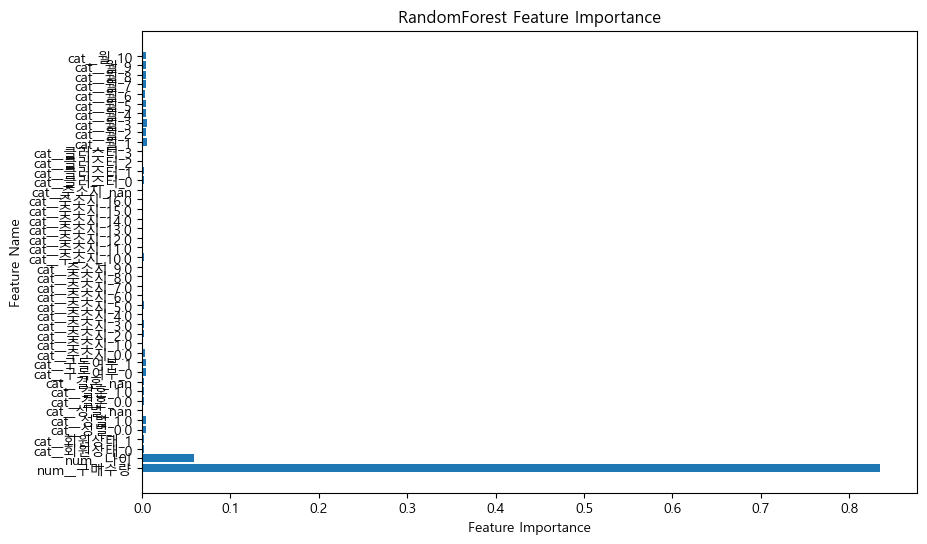

array(['num__Íµ¨Îß§ÏàòÎüâ', 'num__ÎÇòÏù¥'], dtype=object)

In [559]:
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_
feature_names = preprocessor.get_feature_names_out()

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("RandomForest Feature Importance")
plt.show()

threshold = 0.01  # Ï§ëÏöîÎèÑÍ∞Ä 1% Ïù¥ÌïòÏù∏ Î≥ÄÏàò Ï†úÍ±∞
selected_features = feature_names[feature_importances > threshold]
selected_features

In [604]:
memberwise_delivery = df_sales.pivot_table(index=['ÌöåÏõêÎ≤àÌò∏', 'Ï£ºÎ¨∏ÏùºÏãú', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº'], values='Íµ¨Îß§ÏàòÎüâ', aggfunc='count').reset_index()
memberwise_delivery[['Ï£ºÎ¨∏ÏùºÏãú', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº']] = memberwise_delivery[['Ï£ºÎ¨∏ÏùºÏãú', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº']].apply(pd.to_datetime)

temp3 = pd.merge(df_member, memberwise_delivery)
# 1. ÌÉÄÍ≤ü Î≥ÄÏàò (Î∞∞ÏÜ°ÏßÄÏó∞) Ïû¨ÏÑ§Ï†ï
temp3['Î∞∞ÏÜ°ÏßÄÏó∞'] = ((temp3['Î∞∞ÏÜ°ÏôÑÎ£åÏùº'] - temp3['Ï£ºÎ¨∏ÏùºÏãú']) > datetime.timedelta(days=2)).astype(int)



# 1. tqdm ÏÑ§Ï†ï
tqdm.pandas()

# 2. ÌÉÄÍ≤ü Î≥ÄÏàò (Î∞∞ÏÜ°ÏßÄÏó∞) Ïû¨ÏÑ§Ï†ï
temp3['Î∞∞ÏÜ°ÏßÄÏó∞'] = ((temp3['Î∞∞ÏÜ°ÏôÑÎ£åÏùº'] - temp3['Ï£ºÎ¨∏ÏùºÏãú']) > datetime.timedelta(days=2)).astype(int)


X = temp3

# 2. Î≤îÏ£ºÌòï Î≥ÄÏàò Ï≤òÎ¶¨
X['ÏÑ±Î≥Ñ'] = X['ÏÑ±Î≥Ñ'].replace({'ÎÇ®': 1, 'Ïó¨': 0})
X['ÌöåÏõêÏÉÅÌÉú'] = X['ÌöåÏõêÏÉÅÌÉú'].replace({'Ï†ïÏÉÅÌöåÏõê': 1, 'ÌÉàÌá¥': 0, 'ÌÉàÌá¥Ïã†Ï≤≠': 0, 'ÌÉàÌá¥Ï≤òÎ¶¨Ï§ë': 0, np.nan: 0}).astype(int)
X['Í≤∞Ìòº'] = X['Í≤∞Ìòº'].replace({'Í∏∞Ìòº': 1, 'ÎØ∏Ìòº': 0})
X['Íµ¨ÎèÖÏó¨Î∂Ä'] = X['Íµ¨ÎèÖÏó¨Î∂Ä'].replace('nan', np.nan).fillna(0).replace({'False': 0, 'True': 1}).astype(int)
X['Ïõî'] = X['Ï£ºÎ¨∏ÏùºÏãú'].dt.month



X['Ï£ºÏÜåÏßÄ'] = X['Ï£ºÏÜåÏßÄ'].replace({
    'Í≤ΩÍ∏∞ÎèÑ': 0, 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú': 1, 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú': 2, 'Í≤ΩÏÉÅÎÇ®ÎèÑ': 3, 'Í≤ΩÏÉÅÎ∂ÅÎèÑ': 4, 'ÎåÄÍµ¨Í¥ëÏó≠Ïãú': 5, 'Í∞ïÏõêÎèÑ': 6,
    'Ï†ÑÎùºÎ∂ÅÎèÑ': 7, 'Ï∂©Ï≤≠ÎÇ®ÎèÑ': 8, 'Ïù∏Ï≤úÍ¥ëÏó≠Ïãú': 9, 'Ï∂©Ï≤≠Î∂ÅÎèÑ': 10, 'ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú': 11, 'Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú': 12, 'Ï†ÑÎùºÎÇ®ÎèÑ': 13,
    'Í¥ëÏ£ºÍ¥ëÏó≠Ïãú': 14, 'ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú': 15, 'Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ': 16, 'Í≤ΩÍ∏∞': 0, 'Í¥ëÏ£º': 14, 'Í∞ïÏõê': 6, 'ÏÑúÏö∏': 1
})

# 3. ÌïÑÏöî ÏóÜÎäî Ïª¨Îüº Ï†úÍ±∞
X = X.drop(columns=['ÌöåÏõêÎ≤àÌò∏', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº', 'Ï£ºÎ¨∏ÏùºÏãú', 'ÏÑ∏Î∂ÄÏ£ºÏÜåÏßÄ', 'Îì±Î°ùÏπ¥Îìú', 'Î∞∞ÏÜ°ÏßÄÏó∞', 'ÌÅ¥Îü¨Ïä§ÌÑ∞', 'Ï£ºÏÜåÏßÄ'])
y = temp3['Î∞∞ÏÜ°ÏßÄÏó∞']


# 5. Ï†ÑÏ≤òÎ¶¨ (ÌëúÏ§ÄÌôî + Ïõê-Ìï´ Ïù∏ÏΩîÎî©)
categorical_features = ['ÌöåÏõêÏÉÅÌÉú', 'ÏÑ±Î≥Ñ', 'Í≤∞Ìòº', 'Íµ¨ÎèÖÏó¨Î∂Ä', 'Ïõî']
numerical_features = ['Íµ¨Îß§ÏàòÎüâ', 'ÎÇòÏù¥']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])


# tqdm Ï†ÅÏö©ÌïòÏó¨ Î≥ÄÌôò Í≥ºÏ†ï ÏãúÍ∞ÅÌôî
X_transformed = preprocessor.fit_transform(X)  # np.array Î≥ÄÌôò Ï†úÍ±∞!


# 6. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=1234, stratify=y)

# 7. Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†Ìòï Ï≤òÎ¶¨
smote = SMOTE(sampling_strategy=0.3, random_state=1234)
X_train, y_train = smote.fit_resample(X_train, y_train)


# 8. RandomForestÏóê tqdm Ï†ÅÏö©
def fit_with_progress(model, X_train, y_train):
    """ tqdmÏùÑ Ï†ÅÏö©Ìïú ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ ÌïôÏäµ """
    with joblib.parallel_backend('threading', n_jobs=-1):  # Î≥ëÎ†¨ Ï≤òÎ¶¨
        model.fit(X_train, y_train)

# 9. ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ ÌõàÎ†® (ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ï†ï)
model = RandomForestClassifier(
    n_estimators=200,  # Ìä∏Î¶¨ Í∞úÏàò Ï¶ùÍ∞Ä
    max_depth=10,  # Ìä∏Î¶¨ ÍπäÏù¥ Ï¶ùÍ∞Ä
    random_state=1234,
    n_jobs=-1,
    class_weight='balanced_subsample'  # ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Ï°∞Ï†ï
)


print("üîπ Î™®Îç∏ ÌïôÏäµ Ï§ë...")
fit_with_progress(model, X_train, y_train)

# 10. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


C:\Users\eugin\AppData\Local\Temp\ipykernel_46516\471935064.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['ÏÑ±Î≥Ñ'] = X['ÏÑ±Î≥Ñ'].replace({'ÎÇ®': 1, 'Ïó¨': 0})
C:\Users\eugin\AppData\Local\Temp\ipykernel_46516\471935064.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['ÌöåÏõêÏÉÅÌÉú'] = X['ÌöåÏõêÏÉÅÌÉú'].replace({'Ï†ïÏÉÅÌöåÏõê': 1, 'ÌÉàÌá¥': 0, 'ÌÉàÌá¥Ïã†Ï≤≠': 0, 'ÌÉàÌá¥Ï≤òÎ¶¨Ï§ë': 0, np.nan: 0}).astype(int)
C:\Users\eugin\AppData\Local\Temp\ipykernel_46516\471935064.py:22: FutureWarning: Downcasting behavior in `rep

üîπ Î™®Îç∏ ÌïôÏäµ Ï§ë...
[[30148 39413]
 [  508  5295]]
              precision    recall  f1-score   support

           0       0.98      0.43      0.60     69561
           1       0.12      0.91      0.21      5803

    accuracy                           0.47     75364
   macro avg       0.55      0.67      0.41     75364
weighted avg       0.92      0.47      0.57     75364



In [650]:
memberwise_delivery = df_sales.pivot_table(index=['ÌöåÏõêÎ≤àÌò∏', 'Ï£ºÎ¨∏ÏùºÏãú', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº','Ï£ºÎ¨∏ÏãúÍ∞Ñ'], values='Íµ¨Îß§ÏàòÎüâ', aggfunc='count').reset_index()
memberwise_delivery[['Ï£ºÎ¨∏ÏùºÏãú', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº']] = memberwise_delivery[['Ï£ºÎ¨∏ÏùºÏãú', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº']].apply(pd.to_datetime)
temp3 = pd.merge(df_member, memberwise_delivery)

# 1. tqdm ÏÑ§Ï†ï
tqdm.pandas()

# 2. ÌÉÄÍ≤ü Î≥ÄÏàò (Î∞∞ÏÜ°ÏßÄÏó∞) Ïû¨ÏÑ§Ï†ï
temp3['Î∞∞ÏÜ°ÏßÄÏó∞'] = ((temp3['Î∞∞ÏÜ°ÏôÑÎ£åÏùº'] - temp3['Ï£ºÎ¨∏ÏùºÏãú']) > datetime.timedelta(days=2)).astype(int)

X = temp3

# 2. Î≤îÏ£ºÌòï Î≥ÄÏàò Ï≤òÎ¶¨
X['ÏÑ±Î≥Ñ'] = X['ÏÑ±Î≥Ñ'].replace({'ÎÇ®': 1, 'Ïó¨': 0})
X['ÌöåÏõêÏÉÅÌÉú'] = X['ÌöåÏõêÏÉÅÌÉú'].replace({'Ï†ïÏÉÅÌöåÏõê': 1, 'ÌÉàÌá¥': 0, 'ÌÉàÌá¥Ïã†Ï≤≠': 0, 'ÌÉàÌá¥Ï≤òÎ¶¨Ï§ë': 0, np.nan: 0}).astype(int)
X['Í≤∞Ìòº'] = X['Í≤∞Ìòº'].replace({'Í∏∞Ìòº': 1, 'ÎØ∏Ìòº': 0})
X['Íµ¨ÎèÖÏó¨Î∂Ä'] = X['Íµ¨ÎèÖÏó¨Î∂Ä'].replace('nan', np.nan).fillna(0).replace({'False': 0, 'True': 1}).astype(int)
X['Ïõî'] = X['Ï£ºÎ¨∏ÏùºÏãú'].dt.month



X['Ï£ºÏÜåÏßÄ'] = X['Ï£ºÏÜåÏßÄ'].replace({
    'Í≤ΩÍ∏∞ÎèÑ': 0, 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú': 1, 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú': 2, 'Í≤ΩÏÉÅÎÇ®ÎèÑ': 3, 'Í≤ΩÏÉÅÎ∂ÅÎèÑ': 4, 'ÎåÄÍµ¨Í¥ëÏó≠Ïãú': 5, 'Í∞ïÏõêÎèÑ': 6,
    'Ï†ÑÎùºÎ∂ÅÎèÑ': 7, 'Ï∂©Ï≤≠ÎÇ®ÎèÑ': 8, 'Ïù∏Ï≤úÍ¥ëÏó≠Ïãú': 9, 'Ï∂©Ï≤≠Î∂ÅÎèÑ': 10, 'ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú': 11, 'Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú': 12, 'Ï†ÑÎùºÎÇ®ÎèÑ': 13,
    'Í¥ëÏ£ºÍ¥ëÏó≠Ïãú': 14, 'ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú': 15, 'Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ': 16, 'Í≤ΩÍ∏∞': 0, 'Í¥ëÏ£º': 14, 'Í∞ïÏõê': 6, 'ÏÑúÏö∏': 1
})


# Ï£ºÎ¨∏ÏãúÍ∞ÑÏùÑ 24ÏãúÍ∞Ñ ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
def convert_to_minutes(order_time):
    time_parts = order_time.split()
    period = time_parts[0]  # Ïò§Ï†Ñ/Ïò§ÌõÑ
    hour, minute = map(int, time_parts[1].split(':'))

    # 12ÏãúÍ∞Ñ ÌòïÏãùÏóêÏÑú 24ÏãúÍ∞Ñ ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
    if period == 'Ïò§ÌõÑ' and hour != 12:
        hour += 12
    elif period == 'Ïò§Ï†Ñ' and hour == 12:
        hour = 0

    # Ï¥ù Î∂ÑÏúºÎ°ú Î≥ÄÌôò
    return hour * 60 + minute

# Î≥ÄÌôò Ï†ÅÏö©
X['Ï£ºÎ¨∏ÏãúÍ∞Ñ_Î∂Ñ'] = X['Ï£ºÎ¨∏ÏãúÍ∞Ñ'].apply(convert_to_minutes)


# 3. ÌïÑÏöî ÏóÜÎäî Ïª¨Îüº Ï†úÍ±∞
X = X.drop(columns=['ÌöåÏõêÎ≤àÌò∏', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº', 'Ï£ºÎ¨∏ÏùºÏãú', 'ÏÑ∏Î∂ÄÏ£ºÏÜåÏßÄ', 'Îì±Î°ùÏπ¥Îìú', 'Î∞∞ÏÜ°ÏßÄÏó∞', 'ÌÅ¥Îü¨Ïä§ÌÑ∞', 'Ïõî', 'Ï£ºÎ¨∏ÏãúÍ∞Ñ','ÎÇòÏù¥','Í≤∞Ìòº','ÏÑ±Î≥Ñ','Íµ¨ÎèÖÏó¨Î∂Ä'])
y = temp3['Î∞∞ÏÜ°ÏßÄÏó∞']

# 5. Ï†ÑÏ≤òÎ¶¨ (ÌëúÏ§ÄÌôî + Ïõê-Ìï´ Ïù∏ÏΩîÎî©)
categorical_features = ['ÌöåÏõêÏÉÅÌÉú', 'Ï£ºÏÜåÏßÄ']
numerical_features = ['Íµ¨Îß§ÏàòÎüâ', 'Ï£ºÎ¨∏ÏãúÍ∞Ñ_Î∂Ñ']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])


# tqdm Ï†ÅÏö©ÌïòÏó¨ Î≥ÄÌôò Í≥ºÏ†ï ÏãúÍ∞ÅÌôî
X_transformed = preprocessor.fit_transform(X) 


# 6. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=1234)

# 7. Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†Ìòï Ï≤òÎ¶¨ (SMOTE Ï†ÅÏö©)
smote = SMOTE(sampling_strategy=0.4, random_state=1234)
X_train, y_train = smote.fit_resample(X_train, y_train)

# 8. LightGBM Î™®Îç∏ ÏÑ§Ï†ï
model = lgb.LGBMClassifier(
    n_estimators=200,  # Ìä∏Î¶¨ Í∞úÏàò Ï¶ùÍ∞Ä
    max_depth=15,      # Ìä∏Î¶¨ ÍπäÏù¥ Ï†úÌïú
    learning_rate=0.05,  # ÌïôÏäµÎ•† Ï°∞Ï†ï
    subsample=0.8,       # Í≥ºÏ†ÅÌï© Î∞©ÏßÄ (Îç∞Ïù¥ÌÑ∞ ÏùºÎ∂ÄÎßå ÏÇ¨Ïö©)
    colsample_bytree=0.8, # Í≥ºÏ†ÅÌï© Î∞©ÏßÄ (ÌäπÏÑ± ÏùºÎ∂ÄÎßå ÏÇ¨Ïö©)
    class_weight='balanced',  # ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Ï≤òÎ¶¨
    random_state=1234,
    n_jobs=-1
)

print("üîπ LightGBM Î™®Îç∏ ÌïôÏäµ Ï§ë...")
model.fit(X_train, y_train)

# 10. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\Users\eugin\AppData\Local\Temp\ipykernel_46516\3996938422.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['ÏÑ±Î≥Ñ'] = X['ÏÑ±Î≥Ñ'].replace({'ÎÇ®': 1, 'Ïó¨': 0})
C:\Users\eugin\AppData\Local\Temp\ipykernel_46516\3996938422.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['ÌöåÏõêÏÉÅÌÉú'] = X['ÌöåÏõêÏÉÅÌÉú'].replace({'Ï†ïÏÉÅÌöåÏõê': 1, 'ÌÉàÌá¥': 0, 'ÌÉàÌá¥Ïã†Ï≤≠': 0, 'ÌÉàÌá¥Ï≤òÎ¶¨Ï§ë': 0, np.nan: 0}).astype(int)
C:\Users\eugin\AppData\Local\Temp\ipykernel_46516\3996938422.py:16: FutureWarning: Downcasting behavior in `

üîπ LightGBM Î™®Îç∏ ÌïôÏäµ Ï§ë...
[LightGBM] [Info] Number of positive: 111257, number of negative: 278143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 375
[LightGBM] [Info] Number of data points in the train set: 389400, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


C:\Users\eugin\anaconda3\envs\pytorch\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[[29915 39748]
 [  445  5256]]
              precision    recall  f1-score   support

           0       0.99      0.43      0.60     69663
           1       0.12      0.92      0.21      5701

    accuracy                           0.47     75364
   macro avg       0.55      0.68      0.40     75364
weighted avg       0.92      0.47      0.57     75364



C:\Users\eugin\anaconda3\envs\pytorch\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [91]:
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from tqdm import tqdm
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
memberwise_delivery = df_sales.pivot_table(index=['ÌöåÏõêÎ≤àÌò∏', 'Ï£ºÎ¨∏ÏùºÏãú', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº', 'Ï£ºÎ¨∏ÏãúÍ∞Ñ'], values='Íµ¨Îß§ÏàòÎüâ', aggfunc='count').reset_index()
memberwise_delivery[['Ï£ºÎ¨∏ÏùºÏãú', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº']] = memberwise_delivery[['Ï£ºÎ¨∏ÏùºÏãú', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº']].apply(pd.to_datetime)
temp3 = pd.merge(df_member, memberwise_delivery)

# tqdm ÏÑ§Ï†ï
tqdm.pandas()

# ÌÉÄÍ≤ü Î≥ÄÏàò (Î∞∞ÏÜ°ÏßÄÏó∞) Ïû¨ÏÑ§Ï†ï
temp3['Î∞∞ÏÜ°ÏßÄÏó∞'] = ((temp3['Î∞∞ÏÜ°ÏôÑÎ£åÏùº'] - temp3['Ï£ºÎ¨∏ÏùºÏãú']) > datetime.timedelta(days=2)).astype(int)

X = temp3

# Î≤îÏ£ºÌòï Î≥ÄÏàò Ï≤òÎ¶¨
X['ÏÑ±Î≥Ñ'] = X['ÏÑ±Î≥Ñ'].replace({'ÎÇ®': 1, 'Ïó¨': 0})
X['ÌöåÏõêÏÉÅÌÉú'] = X['ÌöåÏõêÏÉÅÌÉú'].replace({'Ï†ïÏÉÅÌöåÏõê': 1, 'ÌÉàÌá¥': 0, 'ÌÉàÌá¥Ïã†Ï≤≠': 0, 'ÌÉàÌá¥Ï≤òÎ¶¨Ï§ë': 0, np.nan: 0}).astype(int)
X['Í≤∞Ìòº'] = X['Í≤∞Ìòº'].replace({'Í∏∞Ìòº': 1, 'ÎØ∏Ìòº': 0})
X['Íµ¨ÎèÖÏó¨Î∂Ä'] = X['Íµ¨ÎèÖÏó¨Î∂Ä'].replace('nan', np.nan).fillna(0).replace({'False': 0, 'True': 1}).astype(int)
X['Ïõî'] = X['Ï£ºÎ¨∏ÏùºÏãú'].dt.month

X['Ï£ºÏÜåÏßÄ'] = X['Ï£ºÏÜåÏßÄ'].replace({
    'Í≤ΩÍ∏∞ÎèÑ': 0, 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú': 1, 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú': 2, 'Í≤ΩÏÉÅÎÇ®ÎèÑ': 3, 'Í≤ΩÏÉÅÎ∂ÅÎèÑ': 4, 'ÎåÄÍµ¨Í¥ëÏó≠Ïãú': 5, 'Í∞ïÏõêÎèÑ': 6,
    'Ï†ÑÎùºÎ∂ÅÎèÑ': 7, 'Ï∂©Ï≤≠ÎÇ®ÎèÑ': 8, 'Ïù∏Ï≤úÍ¥ëÏó≠Ïãú': 9, 'Ï∂©Ï≤≠Î∂ÅÎèÑ': 10, 'ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú': 11, 'Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú': 12, 'Ï†ÑÎùºÎÇ®ÎèÑ': 13,
    'Í¥ëÏ£ºÍ¥ëÏó≠Ïãú': 14, 'ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú': 15, 'Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ': 16, 'Í≤ΩÍ∏∞': 0, 'Í¥ëÏ£º': 14, 'Í∞ïÏõê': 6, 'ÏÑúÏö∏': 1
})

# Ï£ºÎ¨∏ÏãúÍ∞ÑÏùÑ 24ÏãúÍ∞Ñ ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
def convert_to_minutes(order_time):
    time_parts = order_time.split()
    period = time_parts[0]  # Ïò§Ï†Ñ/Ïò§ÌõÑ
    hour, minute = map(int, time_parts[1].split(':'))

    # 12ÏãúÍ∞Ñ ÌòïÏãùÏóêÏÑú 24ÏãúÍ∞Ñ ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
    if period == 'Ïò§ÌõÑ' and hour != 12:
        hour += 12
    elif period == 'Ïò§Ï†Ñ' and hour == 12:
        hour = 0

    # Ï¥ù Î∂ÑÏúºÎ°ú Î≥ÄÌôò
    if (hour * 60 + minute) > 60*23:
        return 1 #(hour * 60 + minute)
    else:
        return 0 #(hour * 60 + minute)

# Î≥ÄÌôò Ï†ÅÏö©
X['Ï£ºÎ¨∏ÏãúÍ∞Ñ_Î∂Ñ'] = X['Ï£ºÎ¨∏ÏãúÍ∞Ñ'].apply(convert_to_minutes)

# ÌïÑÏöî ÏóÜÎäî Ïª¨Îüº Ï†úÍ±∞
X = X.drop(columns=['ÌöåÏõêÎ≤àÌò∏', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº', 'Ï£ºÎ¨∏ÏùºÏãú', 'ÏÑ∏Î∂ÄÏ£ºÏÜåÏßÄ', 'Îì±Î°ùÏπ¥Îìú', 'Î∞∞ÏÜ°ÏßÄÏó∞', 'ÌÅ¥Îü¨Ïä§ÌÑ∞', 'Ïõî', 'Ï£ºÎ¨∏ÏãúÍ∞Ñ', 'ÎÇòÏù¥', 'Í≤∞Ìòº', 'ÏÑ±Î≥Ñ', 'Íµ¨ÎèÖÏó¨Î∂Ä','ÌöåÏõêÏÉÅÌÉú'])
y = temp3['Î∞∞ÏÜ°ÏßÄÏó∞']

# Ï†ÑÏ≤òÎ¶¨ (ÌëúÏ§ÄÌôî + Ïõê-Ìï´ Ïù∏ÏΩîÎî©)
categorical_features = ['Ï£ºÏÜåÏßÄ']
numerical_features = ['Íµ¨Îß§ÏàòÎüâ', 'Ï£ºÎ¨∏ÏãúÍ∞Ñ_Î∂Ñ']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# tqdm Ï†ÅÏö©ÌïòÏó¨ Î≥ÄÌôò Í≥ºÏ†ï ÏãúÍ∞ÅÌôî
X_transformed = preprocessor.fit_transform(X)

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=1234)

# Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†Ìòï Ï≤òÎ¶¨ (SMOTE Ï†ÅÏö©)
smote = SMOTE(sampling_strategy=0.5, random_state=1234)
X_train, y_train = smote.fit_resample(X_train, y_train)

# LightGBM Î™®Îç∏ ÏÑ§Ï†ï
lgb_model = lgb.LGBMClassifier(
    n_estimators=200,  # Ìä∏Î¶¨ Í∞úÏàò
    max_depth=10,      # Ìä∏Î¶¨ ÍπäÏù¥ Ï†úÌïú
    random_state=1234,
    class_weight='balanced',  # ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Ï≤òÎ¶¨
    n_jobs=-1
)

# Random Forest Î™®Îç∏ ÏÑ§Ï†ï
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=1234,
    class_weight='balanced',
    n_jobs=-1
)

# Voting Classifier ÏÑ§Ï†ï
voting_model = VotingClassifier(
    estimators=[('lgb', lgb_model), ('rf', rf_model)],
    voting='soft'  # soft voting ÏÇ¨Ïö©
)

print("üîπ ÏïôÏÉÅÎ∏î Î™®Îç∏ ÌïôÏäµ Ï§ë...")
voting_model.fit(X_train, y_train)

# ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = voting_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


C:\Users\eugin\AppData\Local\Temp\ipykernel_23020\3472029656.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['ÏÑ±Î≥Ñ'] = X['ÏÑ±Î≥Ñ'].replace({'ÎÇ®': 1, 'Ïó¨': 0})
C:\Users\eugin\AppData\Local\Temp\ipykernel_23020\3472029656.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['ÌöåÏõêÏÉÅÌÉú'] = X['ÌöåÏõêÏÉÅÌÉú'].replace({'Ï†ïÏÉÅÌöåÏõê': 1, 'ÌÉàÌá¥': 0, 'ÌÉàÌá¥Ïã†Ï≤≠': 0, 'ÌÉàÌá¥Ï≤òÎ¶¨Ï§ë': 0, np.nan: 0}).astype(int)
C:\Users\eugin\AppData\Local\Temp\ipykernel_23020\3472029656.py:29: FutureWarning: Downcasting behavior in `

üîπ ÏïôÏÉÅÎ∏î Î™®Îç∏ ÌïôÏäµ Ï§ë...


C:\Users\eugin\anaconda3\envs\pytorch\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 139071, number of negative: 278143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002713 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 95
[LightGBM] [Info] Number of data points in the train set: 417214, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


C:\Users\eugin\anaconda3\envs\pytorch\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[[29864 39799]
 [  433  5268]]
              precision    recall  f1-score   support

           0       0.99      0.43      0.60     69663
           1       0.12      0.92      0.21      5701

    accuracy                           0.47     75364
   macro avg       0.55      0.68      0.40     75364
weighted avg       0.92      0.47      0.57     75364



In [98]:
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from tqdm import tqdm
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTEENN


# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
memberwise_delivery = df_sales.pivot_table(index=['ÌöåÏõêÎ≤àÌò∏', 'Ï£ºÎ¨∏ÏùºÏãú', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº', 'Ï£ºÎ¨∏ÏãúÍ∞Ñ'], values='Íµ¨Îß§ÏàòÎüâ', aggfunc='count').reset_index()
memberwise_delivery[['Ï£ºÎ¨∏ÏùºÏãú', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº']] = memberwise_delivery[['Ï£ºÎ¨∏ÏùºÏãú', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº']].apply(pd.to_datetime)
temp3 = pd.merge(df_member, memberwise_delivery)

# tqdm ÏÑ§Ï†ï
tqdm.pandas()

# ÌÉÄÍ≤ü Î≥ÄÏàò (Î∞∞ÏÜ°ÏßÄÏó∞) Ïû¨ÏÑ§Ï†ï
temp3['Î∞∞ÏÜ°ÏßÄÏó∞'] = ((temp3['Î∞∞ÏÜ°ÏôÑÎ£åÏùº'] - temp3['Ï£ºÎ¨∏ÏùºÏãú']) > datetime.timedelta(days=2)).astype(int)

X = temp3

# Î≤îÏ£ºÌòï Î≥ÄÏàò Ï≤òÎ¶¨
X['ÏÑ±Î≥Ñ'] = X['ÏÑ±Î≥Ñ'].replace({'ÎÇ®': 1, 'Ïó¨': 0})
X['ÌöåÏõêÏÉÅÌÉú'] = X['ÌöåÏõêÏÉÅÌÉú'].replace({'Ï†ïÏÉÅÌöåÏõê': 1, 'ÌÉàÌá¥': 0, 'ÌÉàÌá¥Ïã†Ï≤≠': 0, 'ÌÉàÌá¥Ï≤òÎ¶¨Ï§ë': 0, np.nan: 0}).astype(int)
X['Í≤∞Ìòº'] = X['Í≤∞Ìòº'].replace({'Í∏∞Ìòº': 1, 'ÎØ∏Ìòº': 0})
X['Íµ¨ÎèÖÏó¨Î∂Ä'] = X['Íµ¨ÎèÖÏó¨Î∂Ä'].replace('nan', np.nan).fillna(0).replace({'False': 0, 'True': 1}).astype(int)
X['Ïõî'] = X['Ï£ºÎ¨∏ÏùºÏãú'].dt.month

X['Ï£ºÏÜåÏßÄ'] = X['Ï£ºÏÜåÏßÄ'].replace({
    'Í≤ΩÍ∏∞ÎèÑ': 0, 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú': 1, 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú': 2, 'Í≤ΩÏÉÅÎÇ®ÎèÑ': 3, 'Í≤ΩÏÉÅÎ∂ÅÎèÑ': 4, 'ÎåÄÍµ¨Í¥ëÏó≠Ïãú': 5, 'Í∞ïÏõêÎèÑ': 6,
    'Ï†ÑÎùºÎ∂ÅÎèÑ': 7, 'Ï∂©Ï≤≠ÎÇ®ÎèÑ': 8, 'Ïù∏Ï≤úÍ¥ëÏó≠Ïãú': 9, 'Ï∂©Ï≤≠Î∂ÅÎèÑ': 10, 'ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú': 11, 'Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú': 12, 'Ï†ÑÎùºÎÇ®ÎèÑ': 13,
    'Í¥ëÏ£ºÍ¥ëÏó≠Ïãú': 14, 'ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú': 15, 'Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ': 16, 'Í≤ΩÍ∏∞': 0, 'Í¥ëÏ£º': 14, 'Í∞ïÏõê': 6, 'ÏÑúÏö∏': 1
})

# Ï£ºÎ¨∏ÏãúÍ∞ÑÏùÑ 24ÏãúÍ∞Ñ ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
def convert_to_minutes(order_time):
    time_parts = order_time.split()
    period = time_parts[0]  # Ïò§Ï†Ñ/Ïò§ÌõÑ
    hour, minute = map(int, time_parts[1].split(':'))

    # 12ÏãúÍ∞Ñ ÌòïÏãùÏóêÏÑú 24ÏãúÍ∞Ñ ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
    if period == 'Ïò§ÌõÑ' and hour != 12:
        hour += 12
    elif period == 'Ïò§Ï†Ñ' and hour == 12:
        hour = 0

    # Ï¥ù Î∂ÑÏúºÎ°ú Î≥ÄÌôò
    if (hour * 60 + minute) > 60*22:
        return 1 #(hour * 60 + minute)
    else:
        return 0 #(hour * 60 + minute)

# Î≥ÄÌôò Ï†ÅÏö©
X['Ï£ºÎ¨∏ÏãúÍ∞Ñ_Î∂Ñ'] = X['Ï£ºÎ¨∏ÏãúÍ∞Ñ'].apply(convert_to_minutes)

# ÌïÑÏöî ÏóÜÎäî Ïª¨Îüº Ï†úÍ±∞
X = X.drop(columns=['ÌöåÏõêÎ≤àÌò∏', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº', 'Ï£ºÎ¨∏ÏùºÏãú', 'ÏÑ∏Î∂ÄÏ£ºÏÜåÏßÄ', 'Îì±Î°ùÏπ¥Îìú', 'Î∞∞ÏÜ°ÏßÄÏó∞', 'ÌÅ¥Îü¨Ïä§ÌÑ∞', 'Ïõî', 'Ï£ºÎ¨∏ÏãúÍ∞Ñ', 'ÎÇòÏù¥', 'Í≤∞Ìòº', 'ÏÑ±Î≥Ñ', 'Íµ¨ÎèÖÏó¨Î∂Ä','ÌöåÏõêÏÉÅÌÉú'])
y = temp3['Î∞∞ÏÜ°ÏßÄÏó∞']

# Ï†ÑÏ≤òÎ¶¨ (ÌëúÏ§ÄÌôî + Ïõê-Ìï´ Ïù∏ÏΩîÎî©)
categorical_features = ['Ï£ºÏÜåÏßÄ', 'Ï£ºÎ¨∏ÏãúÍ∞Ñ_Î∂Ñ']
numerical_features = ['Íµ¨Îß§ÏàòÎüâ']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# tqdm Ï†ÅÏö©ÌïòÏó¨ Î≥ÄÌôò Í≥ºÏ†ï ÏãúÍ∞ÅÌôî
X_transformed = preprocessor.fit_transform(X)

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=1234)

# ÌòºÌï© ÏÉòÌîåÎßÅ Ï†ÅÏö© (SMOTE + ENN)
smote_enn = SMOTEENN(random_state=1234)
X_train, y_train = smote_enn.fit_resample(X_train, y_train)

# LightGBM Î™®Îç∏ ÏÑ§Ï†ï
lgb_model = lgb.LGBMClassifier(
    n_estimators=200,  # Ìä∏Î¶¨ Í∞úÏàò
    max_depth=15,      # Ìä∏Î¶¨ ÍπäÏù¥ Ï†úÌïú
    random_state=1234,
#    class_weight='balanced',  # ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Ï≤òÎ¶¨
    n_jobs=-1
)

# Random Forest Î™®Îç∏ ÏÑ§Ï†ï
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    random_state=1234,
#    class_weight='balanced',
    n_jobs=-1
)

# Gradient Boosting Î™®Îç∏ ÏÑ§Ï†ï
gb_model = GradientBoostingClassifier(
    n_estimators=200,
    max_depth=15,
    random_state=1234
)

# Logistic Regression Î™®Îç∏ ÏÑ§Ï†ï
lr_model = LogisticRegression(
    max_iter=200,
    class_weight='balanced',
    random_state=1234
)

# Voting Classifier ÏÑ§Ï†ï
voting_model = VotingClassifier(
    estimators=[('lgb', lgb_model), ('rf', rf_model), ('gb', gb_model), ('lr', lr_model)],
    voting='soft'  # soft voting ÏÇ¨Ïö©
)

print("üîπ ÏïôÏÉÅÎ∏î Î™®Îç∏ ÌïôÏäµ Ï§ë...")
voting_model.fit(X_train, y_train)

# ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = voting_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


C:\Users\eugin\AppData\Local\Temp\ipykernel_23020\2347704428.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['ÏÑ±Î≥Ñ'] = X['ÏÑ±Î≥Ñ'].replace({'ÎÇ®': 1, 'Ïó¨': 0})
C:\Users\eugin\AppData\Local\Temp\ipykernel_23020\2347704428.py:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['ÌöåÏõêÏÉÅÌÉú'] = X['ÌöåÏõêÏÉÅÌÉú'].replace({'Ï†ïÏÉÅÌöåÏõê': 1, 'ÌÉàÌá¥': 0, 'ÌÉàÌá¥Ïã†Ï≤≠': 0, 'ÌÉàÌá¥Ï≤òÎ¶¨Ï§ë': 0, np.nan: 0}).astype(int)
C:\Users\eugin\AppData\Local\Temp\ipykernel_23020\2347704428.py:32: FutureWarning: Downcasting behavior in `

KeyboardInterrupt: 

In [87]:
from imblearn.under_sampling import RandomUnderSampler  # Ïñ∏ÎçîÏÉòÌîåÎßÅÏùÑ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
memberwise_delivery = df_sales.pivot_table(index=['ÌöåÏõêÎ≤àÌò∏', 'Ï£ºÎ¨∏ÏùºÏãú', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº', 'Ï£ºÎ¨∏ÏãúÍ∞Ñ'], values='Íµ¨Îß§ÏàòÎüâ', aggfunc='count').reset_index()
memberwise_delivery[['Ï£ºÎ¨∏ÏùºÏãú', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº']] = memberwise_delivery[['Ï£ºÎ¨∏ÏùºÏãú', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº']].apply(pd.to_datetime)
temp3 = pd.merge(df_member, memberwise_delivery)

# tqdm ÏÑ§Ï†ï
tqdm.pandas()

# ÌÉÄÍ≤ü Î≥ÄÏàò (Î∞∞ÏÜ°ÏßÄÏó∞) Ïû¨ÏÑ§Ï†ï
temp3['Î∞∞ÏÜ°ÏßÄÏó∞'] = ((temp3['Î∞∞ÏÜ°ÏôÑÎ£åÏùº'] - temp3['Ï£ºÎ¨∏ÏùºÏãú']) > datetime.timedelta(days=2)).astype(int)

X = temp3

# Î≤îÏ£ºÌòï Î≥ÄÏàò Ï≤òÎ¶¨
X['ÏÑ±Î≥Ñ'] = X['ÏÑ±Î≥Ñ'].replace({'ÎÇ®': 1, 'Ïó¨': 0})
X['ÌöåÏõêÏÉÅÌÉú'] = X['ÌöåÏõêÏÉÅÌÉú'].replace({'Ï†ïÏÉÅÌöåÏõê': 1, 'ÌÉàÌá¥': 0, 'ÌÉàÌá¥Ïã†Ï≤≠': 0, 'ÌÉàÌá¥Ï≤òÎ¶¨Ï§ë': 0, np.nan: 0}).astype(int)
X['Í≤∞Ìòº'] = X['Í≤∞Ìòº'].replace({'Í∏∞Ìòº': 1, 'ÎØ∏Ìòº': 0})
X['Íµ¨ÎèÖÏó¨Î∂Ä'] = X['Íµ¨ÎèÖÏó¨Î∂Ä'].replace('nan', np.nan).fillna(0).replace({'False': 0, 'True': 1}).astype(int)
X['Ïõî'] = X['Ï£ºÎ¨∏ÏùºÏãú'].dt.month

X['Ï£ºÏÜåÏßÄ'] = X['Ï£ºÏÜåÏßÄ'].replace({
    'Í≤ΩÍ∏∞ÎèÑ': 0, 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú': 1, 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú': 2, 'Í≤ΩÏÉÅÎÇ®ÎèÑ': 3, 'Í≤ΩÏÉÅÎ∂ÅÎèÑ': 4, 'ÎåÄÍµ¨Í¥ëÏó≠Ïãú': 5, 'Í∞ïÏõêÎèÑ': 6,
    'Ï†ÑÎùºÎ∂ÅÎèÑ': 7, 'Ï∂©Ï≤≠ÎÇ®ÎèÑ': 8, 'Ïù∏Ï≤úÍ¥ëÏó≠Ïãú': 9, 'Ï∂©Ï≤≠Î∂ÅÎèÑ': 10, 'ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú': 11, 'Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú': 12, 'Ï†ÑÎùºÎÇ®ÎèÑ': 13,
    'Í¥ëÏ£ºÍ¥ëÏó≠Ïãú': 14, 'ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú': 15, 'Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ': 16, 'Í≤ΩÍ∏∞': 0, 'Í¥ëÏ£º': 14, 'Í∞ïÏõê': 6, 'ÏÑúÏö∏': 1, np.nan:1
})

# Ï£ºÎ¨∏ÏãúÍ∞ÑÏùÑ 24ÏãúÍ∞Ñ ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
def convert_to_minutes(order_time):
    time_parts = order_time.split()
    period = time_parts[0]  # Ïò§Ï†Ñ/Ïò§ÌõÑ
    hour, minute = map(int, time_parts[1].split(':'))

    # 12ÏãúÍ∞Ñ ÌòïÏãùÏóêÏÑú 24ÏãúÍ∞Ñ ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
    if period == 'Ïò§ÌõÑ' and hour != 12:
        hour += 12
    elif period == 'Ïò§Ï†Ñ' and hour == 12:
        hour = 0

    # Ï¥ù Î∂ÑÏúºÎ°ú Î≥ÄÌôò
    if (hour * 60 + minute) > 60*23.5:
        return 1 #hour * 60 + minute
    else:
        return 0 # hour * 60 + minute

# Î≥ÄÌôò Ï†ÅÏö©
X['Ï£ºÎ¨∏ÏãúÍ∞Ñ_Î∂Ñ'] = X['Ï£ºÎ¨∏ÏãúÍ∞Ñ'].apply(convert_to_minutes)

# ÌïÑÏöî ÏóÜÎäî Ïª¨Îüº Ï†úÍ±∞
X = X.drop(columns=['ÌöåÏõêÎ≤àÌò∏', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº', 'Ï£ºÎ¨∏ÏùºÏãú', 'ÏÑ∏Î∂ÄÏ£ºÏÜåÏßÄ', 'Îì±Î°ùÏπ¥Îìú', 'Î∞∞ÏÜ°ÏßÄÏó∞', 'ÌÅ¥Îü¨Ïä§ÌÑ∞', 'Ïõî', 'Ï£ºÎ¨∏ÏãúÍ∞Ñ', 'ÎÇòÏù¥', 'Í≤∞Ìòº', 'ÏÑ±Î≥Ñ', 'Íµ¨ÎèÖÏó¨Î∂Ä','ÌöåÏõêÏÉÅÌÉú'])
y = temp3['Î∞∞ÏÜ°ÏßÄÏó∞']

# Ï†ÑÏ≤òÎ¶¨ (ÌëúÏ§ÄÌôî + Ïõê-Ìï´ Ïù∏ÏΩîÎî©)
categorical_features = ['Ï£ºÏÜåÏßÄ']
numerical_features = ['Íµ¨Îß§ÏàòÎüâ','Ï£ºÎ¨∏ÏãúÍ∞Ñ_Î∂Ñ']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# tqdm Ï†ÅÏö©ÌïòÏó¨ Î≥ÄÌôò Í≥ºÏ†ï ÏãúÍ∞ÅÌôî
X_transformed = preprocessor.fit_transform(X)

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.25, random_state=1234, stratify=y)

# Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†Ìòï Ï≤òÎ¶¨ (SMOTE Ï†ÅÏö©)
under_sampler = RandomUnderSampler(random_state=1234)
X_train, y_train = under_sampler.fit_resample(X_train, y_train)

# LightGBM Î™®Îç∏ ÏÑ§Ï†ï
lgb_model = lgb.LGBMClassifier(
    n_estimators=200,  # Ìä∏Î¶¨ Í∞úÏàò
    max_depth=15,      # Ìä∏Î¶¨ ÍπäÏù¥ Ï†úÌïú
    random_state=1234,
#    class_weight='balanced',  # ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Ï≤òÎ¶¨
    n_jobs=-1
)

# Random Forest Î™®Îç∏ ÏÑ§Ï†ï
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    random_state=1234,
    class_weight='balanced',
    n_jobs=-1
)

# Voting Classifier ÏÑ§Ï†ï
voting_model = VotingClassifier(
    estimators=[('lgb', lgb_model), ('rf', rf_model)],
    voting='soft'  # soft voting ÏÇ¨Ïö©
)

print("üîπ ÏïôÏÉÅÎ∏î Î™®Îç∏ ÌïôÏäµ Ï§ë...")
voting_model.fit(X_train, y_train)

# ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = voting_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


C:\Users\eugin\AppData\Local\Temp\ipykernel_23020\651822879.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['ÏÑ±Î≥Ñ'] = X['ÏÑ±Î≥Ñ'].replace({'ÎÇ®': 1, 'Ïó¨': 0})
C:\Users\eugin\AppData\Local\Temp\ipykernel_23020\651822879.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['ÌöåÏõêÏÉÅÌÉú'] = X['ÌöåÏõêÏÉÅÌÉú'].replace({'Ï†ïÏÉÅÌöåÏõê': 1, 'ÌÉàÌá¥': 0, 'ÌÉàÌá¥Ïã†Ï≤≠': 0, 'ÌÉàÌá¥Ï≤òÎ¶¨Ï§ë': 0, np.nan: 0}).astype(int)
C:\Users\eugin\AppData\Local\Temp\ipykernel_23020\651822879.py:19: FutureWarning: Downcasting behavior in `rep

üîπ ÏïôÏÉÅÎ∏î Î™®Îç∏ ÌïôÏäµ Ï§ë...
[LightGBM] [Info] Number of positive: 21760, number of negative: 21760
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001292 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 51
[LightGBM] [Info] Number of data points in the train set: 43520, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\eugin\anaconda3\envs\pytorch\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\eugin\anaconda3\envs\pytorch\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[[37139 49813]
 [  572  6681]]
              precision    recall  f1-score   support

           0       0.98      0.43      0.60     86952
           1       0.12      0.92      0.21      7253

    accuracy                           0.47     94205
   macro avg       0.55      0.67      0.40     94205
weighted avg       0.92      0.47      0.57     94205



### Î≥µÌï© ÏÉòÌîåÎßÅ

In [80]:
## from tqdm import tqdm
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.combine import SMOTEENN
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
memberwise_delivery = df_sales.pivot_table(index=['ÌöåÏõêÎ≤àÌò∏', 'Ï£ºÎ¨∏ÏùºÏãú', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº', 'Ï£ºÎ¨∏ÏãúÍ∞Ñ'], values='Íµ¨Îß§ÏàòÎüâ', aggfunc='count').reset_index()
memberwise_delivery[['Ï£ºÎ¨∏ÏùºÏãú', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº']] = memberwise_delivery[['Ï£ºÎ¨∏ÏùºÏãú', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº']].apply(pd.to_datetime)
temp3 = pd.merge(df_member, memberwise_delivery)

# tqdm ÏÑ§Ï†ï
tqdm.pandas()

# ÌÉÄÍ≤ü Î≥ÄÏàò (Î∞∞ÏÜ°ÏßÄÏó∞) Ïû¨ÏÑ§Ï†ï
temp3['Î∞∞ÏÜ°ÏßÄÏó∞'] = ((temp3['Î∞∞ÏÜ°ÏôÑÎ£åÏùº'] - temp3['Ï£ºÎ¨∏ÏùºÏãú']) > datetime.timedelta(days=2)).astype(int)

X = temp3

# Î≤îÏ£ºÌòï Î≥ÄÏàò Ï≤òÎ¶¨
X['ÏÑ±Î≥Ñ'] = X['ÏÑ±Î≥Ñ'].replace({'ÎÇ®': 1, 'Ïó¨': 0})
X['ÌöåÏõêÏÉÅÌÉú'] = X['ÌöåÏõêÏÉÅÌÉú'].replace({'Ï†ïÏÉÅÌöåÏõê': 1, 'ÌÉàÌá¥': 0, 'ÌÉàÌá¥Ïã†Ï≤≠': 0, 'ÌÉàÌá¥Ï≤òÎ¶¨Ï§ë': 0, np.nan: 0}).astype(int)
X['Í≤∞Ìòº'] = X['Í≤∞Ìòº'].replace({'Í∏∞Ìòº': 1, 'ÎØ∏Ìòº': 0})
X['Íµ¨ÎèÖÏó¨Î∂Ä'] = X['Íµ¨ÎèÖÏó¨Î∂Ä'].replace('nan', np.nan).fillna(0).replace({'False': 0, 'True': 1}).astype(int)
X['Ïõî'] = X['Ï£ºÎ¨∏ÏùºÏãú'].dt.month

X['Ï£ºÏÜåÏßÄ'] = X['Ï£ºÏÜåÏßÄ'].replace({
    'Í≤ΩÍ∏∞ÎèÑ': 0, 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú': 1, 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú': 2, 'Í≤ΩÏÉÅÎÇ®ÎèÑ': 3, 'Í≤ΩÏÉÅÎ∂ÅÎèÑ': 4, 'ÎåÄÍµ¨Í¥ëÏó≠Ïãú': 5, 'Í∞ïÏõêÎèÑ': 6,
    'Ï†ÑÎùºÎ∂ÅÎèÑ': 7, 'Ï∂©Ï≤≠ÎÇ®ÎèÑ': 8, 'Ïù∏Ï≤úÍ¥ëÏó≠Ïãú': 9, 'Ï∂©Ï≤≠Î∂ÅÎèÑ': 10, 'ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú': 11, 'Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú': 12, 'Ï†ÑÎùºÎÇ®ÎèÑ': 13,
    'Í¥ëÏ£ºÍ¥ëÏó≠Ïãú': 14, 'ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú': 15, 'Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ': 16, 'Í≤ΩÍ∏∞': 0, 'Í¥ëÏ£º': 14, 'Í∞ïÏõê': 6, 'ÏÑúÏö∏': 1, np.nan:1
})
X['Ï£ºÏÜåÏßÄ'] = X['Ï£ºÏÜåÏßÄ'].dropna()


# Ï£ºÎ¨∏ÏãúÍ∞ÑÏùÑ 24ÏãúÍ∞Ñ ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
def convert_to_minutes(order_time):
    if pd.isna(order_time):
        return np.nan  # NaNÏùº Í≤ΩÏö∞ NaN Î∞òÌôò
    time_parts = order_time.split()
    period = time_parts[0]  # Ïò§Ï†Ñ/Ïò§ÌõÑ
    hour, minute = map(int, time_parts[1].split(':'))

    # 12ÏãúÍ∞Ñ ÌòïÏãùÏóêÏÑú 24ÏãúÍ∞Ñ ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
    if period == 'Ïò§ÌõÑ' and hour != 12:
        hour += 12
    elif period == 'Ïò§Ï†Ñ' and hour == 12:
        hour = 0

    # Ï¥ù Î∂ÑÏúºÎ°ú Î≥ÄÌôò
    return 1 if (hour * 60 + minute) > 60*23.5 else 0

# Î≥ÄÌôò Ï†ÅÏö©
X['Ï£ºÎ¨∏ÏãúÍ∞Ñ_Î∂Ñ'] = X['Ï£ºÎ¨∏ÏãúÍ∞Ñ'].progress_apply(convert_to_minutes)

# ÌïÑÏöî ÏóÜÎäî Ïª¨Îüº Ï†úÍ±∞
X = X.drop(columns=['ÌöåÏõêÎ≤àÌò∏', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº', 'Ï£ºÎ¨∏ÏùºÏãú', 'ÏÑ∏Î∂ÄÏ£ºÏÜåÏßÄ', 'Îì±Î°ùÏπ¥Îìú', 'Î∞∞ÏÜ°ÏßÄÏó∞', 'ÌÅ¥Îü¨Ïä§ÌÑ∞', 'Ïõî', 'Ï£ºÎ¨∏ÏãúÍ∞Ñ', 'ÎÇòÏù¥', 'Í≤∞Ìòº', 'ÏÑ±Î≥Ñ', 'Íµ¨ÎèÖÏó¨Î∂Ä','ÌöåÏõêÏÉÅÌÉú'])
y = temp3['Î∞∞ÏÜ°ÏßÄÏó∞']

# Ï†ÑÏ≤òÎ¶¨ (ÌëúÏ§ÄÌôî + Ïõê-Ìï´ Ïù∏ÏΩîÎî©)
categorical_features = ['Ï£ºÏÜåÏßÄ']
numerical_features = ['Íµ¨Îß§ÏàòÎüâ', 'Ï£ºÎ¨∏ÏãúÍ∞Ñ_Î∂Ñ']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=y)


# ÌòºÌï© ÏÉòÌîåÎßÅ Ï†ÅÏö© (SMOTE + ENN)
smote_enn = SMOTEENN(random_state=1234)
X_train, y_train = smote_enn.fit_resample(X_train, y_train)

# LightGBM Î™®Îç∏ ÏÑ§Ï†ï
lgb_model = lgb.LGBMClassifier(
    n_estimators=200,
    max_depth=17,
    random_state=1234,
    n_jobs=-1
)

# Random Forest Î™®Îç∏ ÏÑ§Ï†ï
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=17,
    random_state=1234,
    class_weight='balanced',
    n_jobs=-1
)

# Voting Classifier ÏÑ§Ï†ï
voting_model = VotingClassifier(
    estimators=[('lgb', lgb_model), ('rf', rf_model)],
    voting='soft'
)

print("üîπ ÏïôÏÉÅÎ∏î Î™®Îç∏ ÌïôÏäµ Ï§ë...")
voting_model.fit(X_train, y_train)

# ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = voting_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


C:\Users\eugin\AppData\Local\Temp\ipykernel_23020\1390596257.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['ÏÑ±Î≥Ñ'] = X['ÏÑ±Î≥Ñ'].replace({'ÎÇ®': 1, 'Ïó¨': 0})
C:\Users\eugin\AppData\Local\Temp\ipykernel_23020\1390596257.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['ÌöåÏõêÏÉÅÌÉú'] = X['ÌöåÏõêÏÉÅÌÉú'].replace({'Ï†ïÏÉÅÌöåÏõê': 1, 'ÌÉàÌá¥': 0, 'ÌÉàÌá¥Ïã†Ï≤≠': 0, 'ÌÉàÌá¥Ï≤òÎ¶¨Ï§ë': 0, np.nan: 0}).astype(int)
C:\Users\eugin\AppData\Local\Temp\ipykernel_23020\1390596257.py:29: FutureWarning: Downcasting behavior in `

üîπ ÏïôÏÉÅÎ∏î Î™®Îç∏ ÌïôÏäµ Ï§ë...
[LightGBM] [Info] Number of positive: 369, number of negative: 182695
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000938 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 46
[LightGBM] [Info] Number of data points in the train set: 183064, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002016 -> initscore=-6.204777
[LightGBM] [Info] Start training from score -6.204777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

In [63]:
import lightgbm as lgb

memberwise_delivery = df_sales.pivot_table(index=['ÌöåÏõêÎ≤àÌò∏', 'Ï£ºÎ¨∏ÏùºÏãú', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº'], values='Íµ¨Îß§ÏàòÎüâ', aggfunc='count').reset_index()
memberwise_delivery[['Ï£ºÎ¨∏ÏùºÏãú', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº']] = memberwise_delivery[['Ï£ºÎ¨∏ÏùºÏãú', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº']].apply(pd.to_datetime)

temp3 = pd.merge(df_member, memberwise_delivery)





# 1. tqdm ÏÑ§Ï†ï
tqdm.pandas()

# 2. ÌÉÄÍ≤ü Î≥ÄÏàò (Î∞∞ÏÜ°ÏßÄÏó∞) Ïû¨ÏÑ§Ï†ï
temp3['Î∞∞ÏÜ°ÏßÄÏó∞'] = ((temp3['Î∞∞ÏÜ°ÏôÑÎ£åÏùº'] - temp3['Ï£ºÎ¨∏ÏùºÏãú']) > datetime.timedelta(days=2)).astype(int)


X = temp3

# 2. Î≤îÏ£ºÌòï Î≥ÄÏàò Ï≤òÎ¶¨
X['ÏÑ±Î≥Ñ'] = X['ÏÑ±Î≥Ñ'].replace({'ÎÇ®': 1, 'Ïó¨': 0})
X['ÌöåÏõêÏÉÅÌÉú'] = X['ÌöåÏõêÏÉÅÌÉú'].replace({'Ï†ïÏÉÅÌöåÏõê': 1, 'ÌÉàÌá¥': 0, 'ÌÉàÌá¥Ïã†Ï≤≠': 0, 'ÌÉàÌá¥Ï≤òÎ¶¨Ï§ë': 0, np.nan: 0}).astype(int)
X['Í≤∞Ìòº'] = X['Í≤∞Ìòº'].replace({'Í∏∞Ìòº': 1, 'ÎØ∏Ìòº': 0})
X['Íµ¨ÎèÖÏó¨Î∂Ä'] = X['Íµ¨ÎèÖÏó¨Î∂Ä'].replace('nan', np.nan).fillna(0).replace({'False': 0, 'True': 1}).astype(int)
X['Ïõî'] = X['Ï£ºÎ¨∏ÏùºÏãú'].dt.month



X['Ï£ºÏÜåÏßÄ'] = X['Ï£ºÏÜåÏßÄ'].replace({
    'Í≤ΩÍ∏∞ÎèÑ': 0, 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú': 1, 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú': 2, 'Í≤ΩÏÉÅÎÇ®ÎèÑ': 3, 'Í≤ΩÏÉÅÎ∂ÅÎèÑ': 4, 'ÎåÄÍµ¨Í¥ëÏó≠Ïãú': 5, 'Í∞ïÏõêÎèÑ': 6,
    'Ï†ÑÎùºÎ∂ÅÎèÑ': 7, 'Ï∂©Ï≤≠ÎÇ®ÎèÑ': 8, 'Ïù∏Ï≤úÍ¥ëÏó≠Ïãú': 9, 'Ï∂©Ï≤≠Î∂ÅÎèÑ': 10, 'ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú': 11, 'Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú': 12, 'Ï†ÑÎùºÎÇ®ÎèÑ': 13,
    'Í¥ëÏ£ºÍ¥ëÏó≠Ïãú': 14, 'ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú': 15, 'Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ': 16, 'Í≤ΩÍ∏∞': 0, 'Í¥ëÏ£º': 14, 'Í∞ïÏõê': 6, 'ÏÑúÏö∏': 1, np.nan:1
})

# 3. ÌïÑÏöî ÏóÜÎäî Ïª¨Îüº Ï†úÍ±∞
X = X.drop(columns=['ÌöåÏõêÎ≤àÌò∏', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº', 'Ï£ºÎ¨∏ÏùºÏãú', 'ÏÑ∏Î∂ÄÏ£ºÏÜåÏßÄ', 'Îì±Î°ùÏπ¥Îìú', 'Î∞∞ÏÜ°ÏßÄÏó∞', 'ÌÅ¥Îü¨Ïä§ÌÑ∞', 'Ïõî'])
y = temp3['Î∞∞ÏÜ°ÏßÄÏó∞']




# 5. Ï†ÑÏ≤òÎ¶¨ (ÌëúÏ§ÄÌôî + Ïõê-Ìï´ Ïù∏ÏΩîÎî©)
categorical_features = ['ÌöåÏõêÏÉÅÌÉú', 'ÏÑ±Î≥Ñ', 'Í≤∞Ìòº', 'Íµ¨ÎèÖÏó¨Î∂Ä', 'Ï£ºÏÜåÏßÄ',]
numerical_features = ['Íµ¨Îß§ÏàòÎüâ', 'ÎÇòÏù¥']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])


# tqdm Ï†ÅÏö©ÌïòÏó¨ Î≥ÄÌôò Í≥ºÏ†ï ÏãúÍ∞ÅÌôî
X_transformed = preprocessor.fit_transform(X) 


# 6. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=1234)

# 7. Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†Ìòï Ï≤òÎ¶¨ (SMOTE Ï†ÅÏö©)
smote = SMOTE(sampling_strategy=0.4, random_state=1234)
X_train, y_train = smote.fit_resample(X_train, y_train)

# 8. LightGBM Î™®Îç∏ ÏÑ§Ï†ï
model = lgb.LGBMClassifier(
    n_estimators=300,  # Ìä∏Î¶¨ Í∞úÏàò Ï¶ùÍ∞Ä
    max_depth=20,      # Ìä∏Î¶¨ ÍπäÏù¥ Ï†úÌïú
    learning_rate=0.07,  # ÌïôÏäµÎ•† Ï°∞Ï†ï
    subsample=1,       # Í≥ºÏ†ÅÌï© Î∞©ÏßÄ (Îç∞Ïù¥ÌÑ∞ ÏùºÎ∂ÄÎßå ÏÇ¨Ïö©)
    colsample_bytree=1, # Í≥ºÏ†ÅÌï© Î∞©ÏßÄ (ÌäπÏÑ± ÏùºÎ∂ÄÎßå ÏÇ¨Ïö©)
    class_weight='balanced',  # ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Ï≤òÎ¶¨
    random_state=1234,
    n_jobs=-1
)

print("üîπ LightGBM Î™®Îç∏ ÌïôÏäµ Ï§ë...")
model.fit(X_train, y_train)

# 10. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


C:\Users\eugin\AppData\Local\Temp\ipykernel_23020\1872464435.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['ÏÑ±Î≥Ñ'] = X['ÏÑ±Î≥Ñ'].replace({'ÎÇ®': 1, 'Ïó¨': 0})
C:\Users\eugin\AppData\Local\Temp\ipykernel_23020\1872464435.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['ÌöåÏõêÏÉÅÌÉú'] = X['ÌöåÏõêÏÉÅÌÉú'].replace({'Ï†ïÏÉÅÌöåÏõê': 1, 'ÌÉàÌá¥': 0, 'ÌÉàÌá¥Ïã†Ï≤≠': 0, 'ÌÉàÌá¥Ï≤òÎ¶¨Ï§ë': 0, np.nan: 0}).astype(int)
C:\Users\eugin\AppData\Local\Temp\ipykernel_23020\1872464435.py:24: FutureWarning: Downcasting behavior in `

üîπ LightGBM Î™®Îç∏ ÌïôÏäµ Ï§ë...
[LightGBM] [Info] Number of positive: 97337, number of negative: 243344


C:\Users\eugin\anaconda3\envs\pytorch\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 690
[LightGBM] [Info] Number of data points in the train set: 340681, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


C:\Users\eugin\anaconda3\envs\pytorch\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[[49107 55355]
 [ 1156  7428]]
              precision    recall  f1-score   support

           0       0.98      0.47      0.63    104462
           1       0.12      0.87      0.21      8584

    accuracy                           0.50    113046
   macro avg       0.55      0.67      0.42    113046
weighted avg       0.91      0.50      0.60    113046

